# Airline Passenger Satisfaction Dataset

This dataset contains detailed information about airline passengers, including their demographics, travel characteristics, service ratings, and overall satisfaction. Each row represents one passenger, with numeric features (e.g. age, flight distance, delay times, service ratings) and categorical descriptors (e.g. gender, customer type, type of travel, class, satisfaction).

Source: [Airline Passenger Satisfaction – Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data)

## Data description

| Variable                                   | Definition |
| :----------------------------------------- | :--------- |
| Unnamed: 0                                | Row index (original) |
| id                                        | Passenger identifier |
| Gender                                    | Gender of the passenger |
| Customer Type                             | Loyalty status (Loyal / disloyal Customer) |
| Age                                       | Age of the passenger |
| Type of Travel                            | Purpose of travel (e.g. Business travel, Personal Travel) |
| Class                                     | Travel class (e.g. Eco, Eco Plus, Business) |
| Flight Distance                           | Distance of the flight |
| Inflight wifi service                     | Rating of inflight wifi service (0–5) |
| Departure/Arrival time convenient         | Rating of departure/arrival time convenience (0–5) |
| Ease of Online booking                    | Rating of ease of online booking (0–5) |
| Gate location                             | Rating of gate location (0–5) |
| Food and drink                            | Rating of food and drink (0–5) |
| Online boarding                           | Rating of online boarding (0–5) |
| Seat comfort                              | Rating of seat comfort (0–5) |
| Inflight entertainment                    | Rating of inflight entertainment (0–5) |
| On-board service                          | Rating of on-board service (0–5) |
| Leg room service                          | Rating of leg room service (0–5) |
| Baggage handling                          | Rating of baggage handling (0–5) |
| Checkin service                           | Rating of check-in service (0–5) |
| Inflight service                          | Rating of inflight service (0–5) |
| Cleanliness                               | Rating of cleanliness (0–5) |
| Departure Delay in Minutes                | Departure delay time in minutes |
| Arrival Delay in Minutes                  | Arrival delay time in minutes |
| satisfaction                              | Overall satisfaction label (satisfied / neutral or dissatisfied) |

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import certifi

os.environ.setdefault('SSL_CERT_FILE', certifi.where())

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA

## Data exploration

First we need to load the dataset.

In [2]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1BPENb6JBJvXt-7oRiH9LprkBvrHjKEqT", delimiter=",")
df

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco              160                      5   
1      Business             2863                      1   
2           Eco              192                      2   
3      Business             3377                      0   
4           Eco             1182                      2   
...         ...              ...                    ...   
25971  Business              526                      3   
25972  Business              646                      4   
25973       Eco              828                      2   
25974  Business             1127                      3   
25975       Eco              264                      2   

       Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                      4  ...                       5   
1                                      1  ...                       4   
2                                      0  ...                       2   
3                                      0  ...                       1   
4                                      3  ...                       2   
...                                  ...  ...                     ...   
25971                                  3  ...                       4   
25972                                  4  ...                       4   
25973                                  5  ...                       2   
25974                                  3  ...                       4   
25975                                  5  ...                       1   

       On-board service  Leg room service  Baggage handling  Checkin service  \
0                     5                 5                 5                2   
1                     4                 4                 4                3   
2                     4                 1                 3                2   
3                     1                 1                 1                3   
4                     2                 2                 2                4   
...                 ...               ...               ...              ...   
25971                 3                 2                 4                4   
25972                 4                 5                 5                5   
25973                 4                 3                 4                5   
25974                 3                 2                 5                4   
25975                 1                 2                 1                1   

       Inflight service  Cleanliness  Departure Delay in Minutes  \
0                     5            5                          50   
1                     4            5                           0   
2                     2            2                           0   
3                     1            4                           0   
4                     2            4                           0   
...                 ...          ...                         ...   
25971                 5            4                       

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


We have 25965 rows and 25 clomuns. 5 of them are of the object type, others are numerical type. Column `Arrival Delay in Minutes` does have 83 null values.

In [4]:
df.describe()

Unnamed: 0             id           Age  Flight Distance  \
count  25976.000000   25976.000000  25976.000000     25976.000000   
mean   12987.500000   65005.657992     39.620958      1193.788459   
std     7498.769632   37611.526647     15.135685       998.683999   
min        0.000000      17.000000      7.000000        31.000000   
25%     6493.750000   32170.500000     27.000000       414.000000   
50%    12987.500000   65319.500000     40.000000       849.000000   
75%    19481.250000   97584.250000     51.000000      1744.000000   
max    25975.000000  129877.000000     85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count           25976.000000                       25976.000000   
mean                2.724746                           3.046812   
std                 1.335384                           1.533371   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count            25976.000000   25976.000000    25976.000000     25976.000000   
mean                 2.756775       2.977094        3.215353         3.261665   
std                  1.412951       1.282133        1.331506         1.355536   
min                  0.000000       1.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         4.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

       Seat comfort  Inflight entertainment  On-board service  \
count  25976.000000            25976.000000      25976.000000   
mean       3.449222                3.357753          3.385664   
std        1.320090                1.338299          1.282088   
min        1.000000                0.000000          0.000000   
25%        2.000000                2.000000          2.000000   
50%        4.000000                4.000000          4.000000   
75%        5.000000                4.000000          4.000000   
max        5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count      25976.000000      25976.000000     25976.000000      25976.000000   
mean           3.350169          3.633238         3.314175          3.649253   
std            1.318862          1.176525         1.269332          1.180681   
min            0.000000          1.000000         1.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  25976.000000                 25976.00000              25893.000000  
mean       3.286226                    14.30609                 14.740857  
std        1.319330                    37.42316                 37.517539  
min        0.000000                     0.00000                  0.000000  
25%        2.000000                     0.00000                  0.000000  
50%        3.000000                     0.00000                  0.000000  
75%        4.000000                    12.00000                 13.000000  
max        5.000000                  1128.00000               1115.000000

Average age of passanger is 39 years. 
Flight distances vary widely (mean = 1,194 km, max = 4,983 km), indicating a mix of short‑ to long‑haul flights. Service ratings (wifi, booking, boarding, comfort, entertainment, cleanliness, etc.) are around 3–4 suggesting generally moderate to good perceived service rather than extreme satisfaction or dissatisfaction.

Number of satisfaction levels: 2 - ['satisfied' 'neutral or dissatisfied']


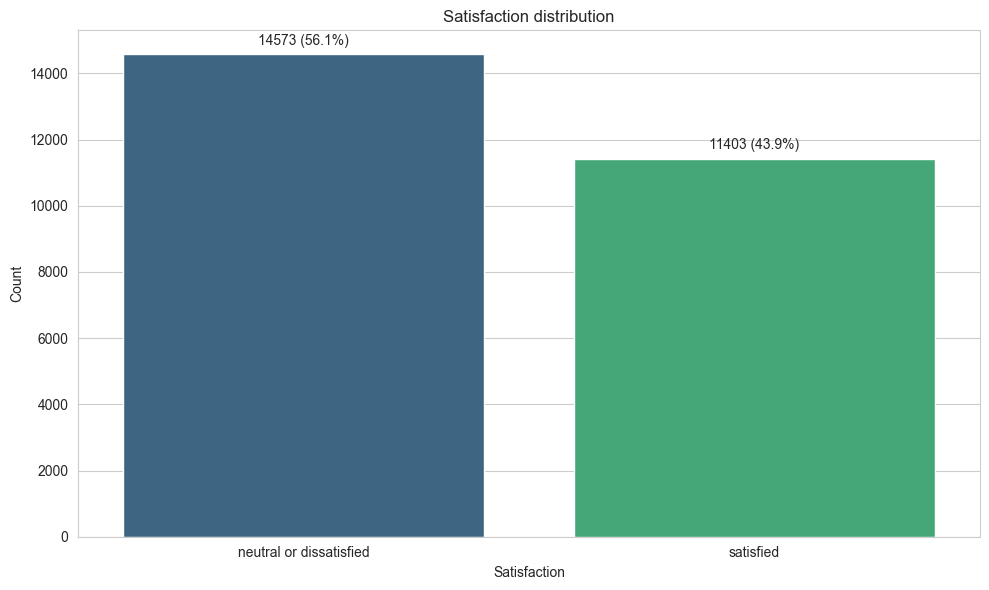

In [5]:
satisfaction = df['satisfaction'].unique()
print(f'Number of satisfaction levels: {len(satisfaction)} - {satisfaction}')

satisfaction_values = df['satisfaction'].value_counts()

total = satisfaction_values.sum()
percentages = (satisfaction_values / total * 100).round(1)

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = sns.barplot(x=satisfaction_values.index, y=satisfaction_values.values, palette="viridis", hue=satisfaction_values.index, dodge=False, legend=False)
ax.set_title("Satisfaction distribution")
ax.set_xlabel("Satisfaction")
ax.set_ylabel("Count")
for p, (cat, count) in zip(ax.patches, satisfaction_values.items()):
    height = p.get_height()
    pct = percentages[cat]
    ax.annotate(f"{int(count)} ({pct}%)",
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

56.1 % are netural or not sattisfied. 43.9% are satisfied.

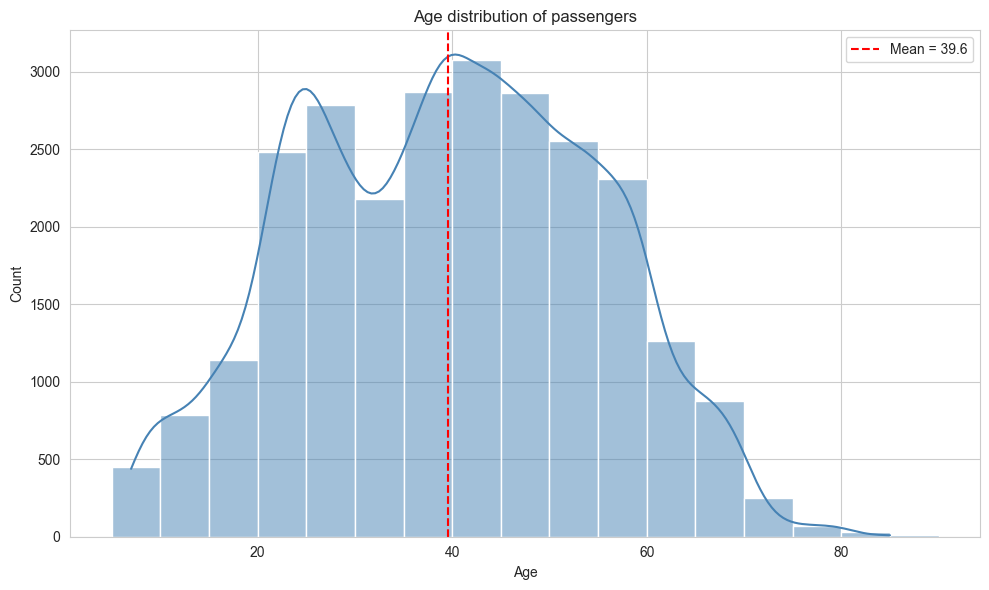

Lowest age: 7, Highest age: 85, Mean age: 39.6


In [6]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ages = df['Age'].dropna()
bins = range(int(ages.min())//5*5, int(ages.max()) + 6, 5)
ax = sns.histplot(ages, bins=bins, kde=True, color='steelblue')
ax.set_title("Age distribution of passengers")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
mean_age = ages.mean()
ax.axvline(mean_age, color='red', linestyle='--', label=f"Mean = {mean_age:.1f}")
ax.legend()
plt.tight_layout()
plt.show()
print(f'Lowest age: {ages.min()}, Highest age: {ages.max()}, Mean age: {mean_age:.1f}')

Most passengers are between their late 20s and mid‑50s, with a clear peak around 40 years old. The age distribution is slightly right‑skewed, indicating fewer older passengers compared to middle‑aged adults, and very young or very old travelers are relatively rare.

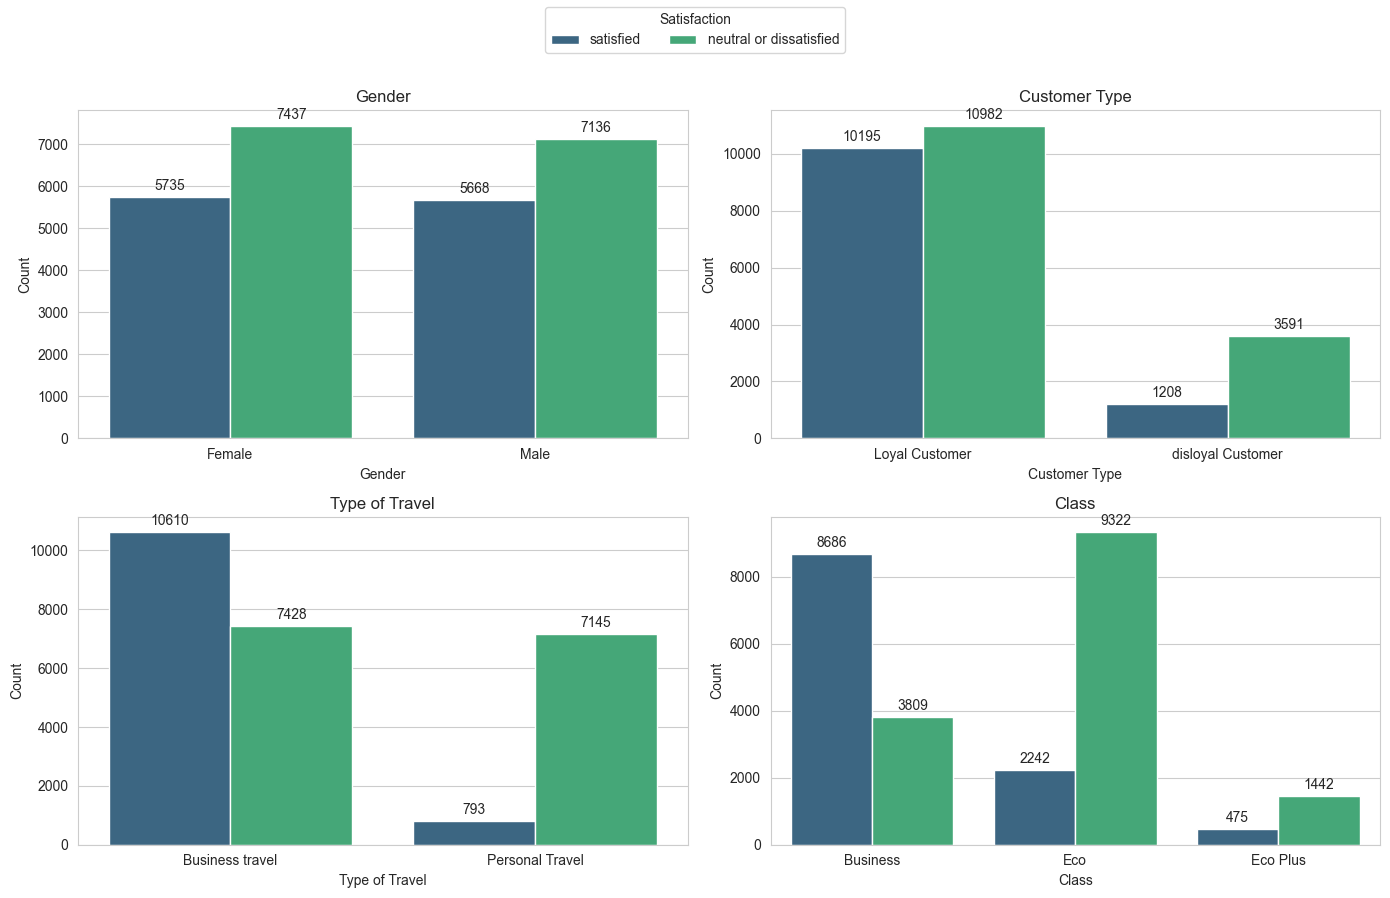

In [7]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

categorical_cols = [c for c in categorical_cols if c in df.columns]

n = len(categorical_cols)
cols = 2
rows = (n + cols - 1) // cols

sns.set_style("whitegrid")
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 4.5 * rows))
axes = axes.flatten()

palette = sns.color_palette("viridis", df['satisfaction'].nunique())

for ax, cat in zip(axes, categorical_cols):
    sns.countplot(data=df, x=cat, hue='satisfaction', palette=palette, ax=ax, order=df[cat].value_counts().index)
    ax.set_title(f"{cat}")
    ax.set_xlabel(cat)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=0)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height)}",
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom',
                        xytext=(0, 3), textcoords='offset points')

for j in range(len(categorical_cols), len(axes)):
    axes[j].set_visible(False)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Satisfaction', loc='upper center', ncol=len(labels))
for ax in axes:
    ax.legend_.remove() if ax.get_legend() else None

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

**Gender:** Both male and female passengers tend to be more often neutral/dissatisfied than satisfied, with no major gender gap.

**Customer Type:** Loyal customers are mostly satisfied, while disloyal customers are dominated by neutral/dissatisfied passengers.

**Type of Travel:** Business travel skews clearly toward satisfied passengers; personal travel is more often neutral/dissatisfied.

**Class:** Business class has more satisfied than neutral/dissatisfied customers, whereas Eco and Eco Plus are strongly skewed toward neutral/dissatisfied.


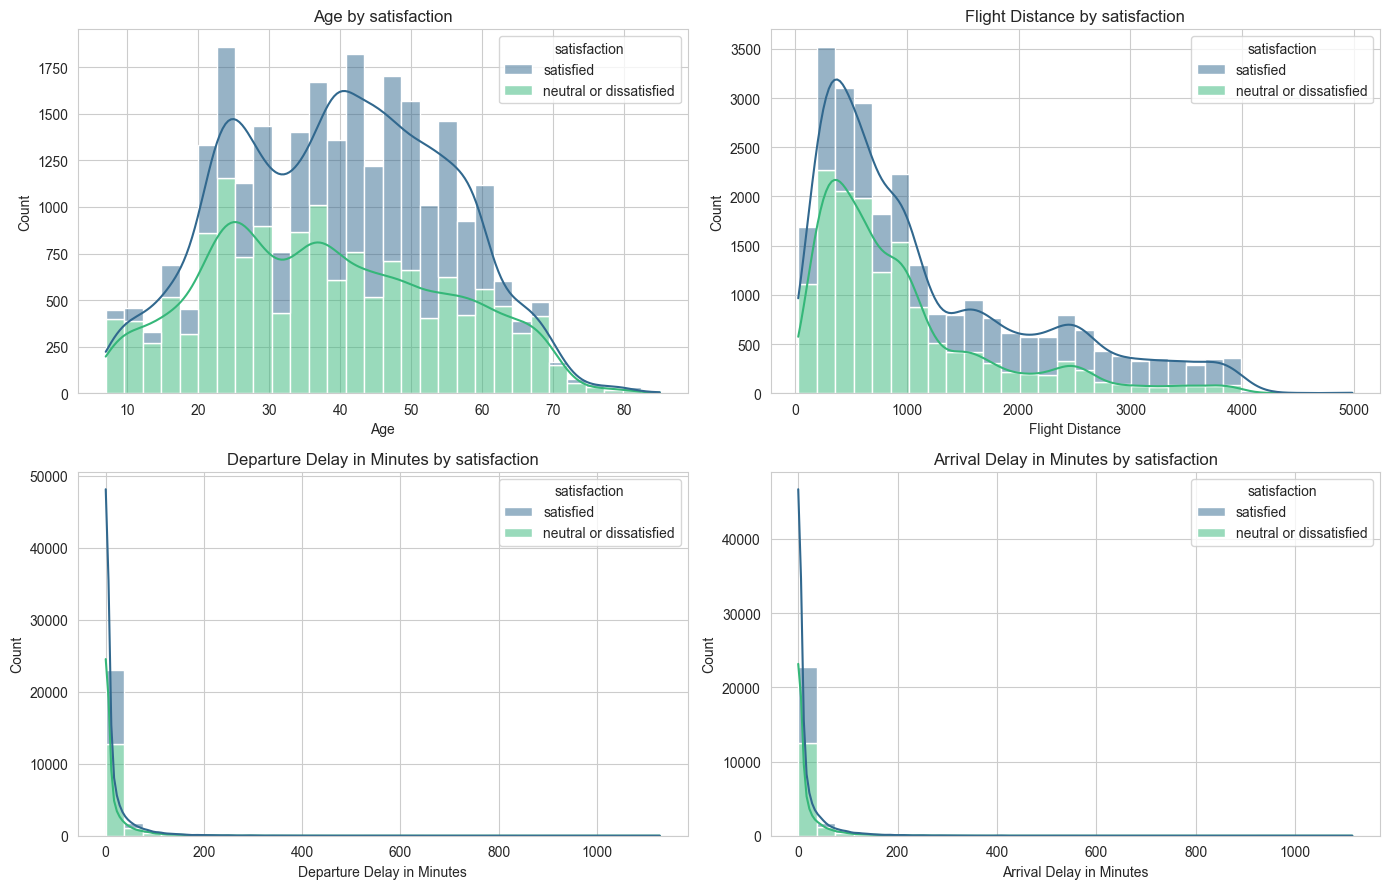

In [ ]:
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

numeric_cols = [c for c in numeric_cols if c in df.columns]

sns.set_style("whitegrid")

n = len(numeric_cols)
cols = 2
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 4.5 * rows))
axes = axes.flatten()

palette = sns.color_palette("viridis", df['satisfaction'].nunique())

for ax, col in zip(axes, numeric_cols):
    sns.histplot(data=df, x=col, hue='satisfaction',
                 multiple='stack', palette=palette, ax=ax, kde=True, bins=30)
    ax.set_title(f"{col} by satisfaction")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Age:** Satisfied passengers cluster more in the late‑30s to mid‑50s range, while neutral/dissatisfied travelers show a broader spread, including more younger and older passengers.

**Flight Distance:** Satisfied passengers tend to fly on longer routes on average, whereas neutral/dissatisfied passengers are more concentrated on shorter to medium distances.

**Departure Delay:** Neutral/dissatisfied passengers experience slightly higher and more variable departure delays, with more extreme long delays than satisfied passengers.

**Arrival Delay:** Arrival delays are also more spread out and extreme for neutral/dissatisfied passengers, suggesting that punctuality issues are linked to lower satisfaction.

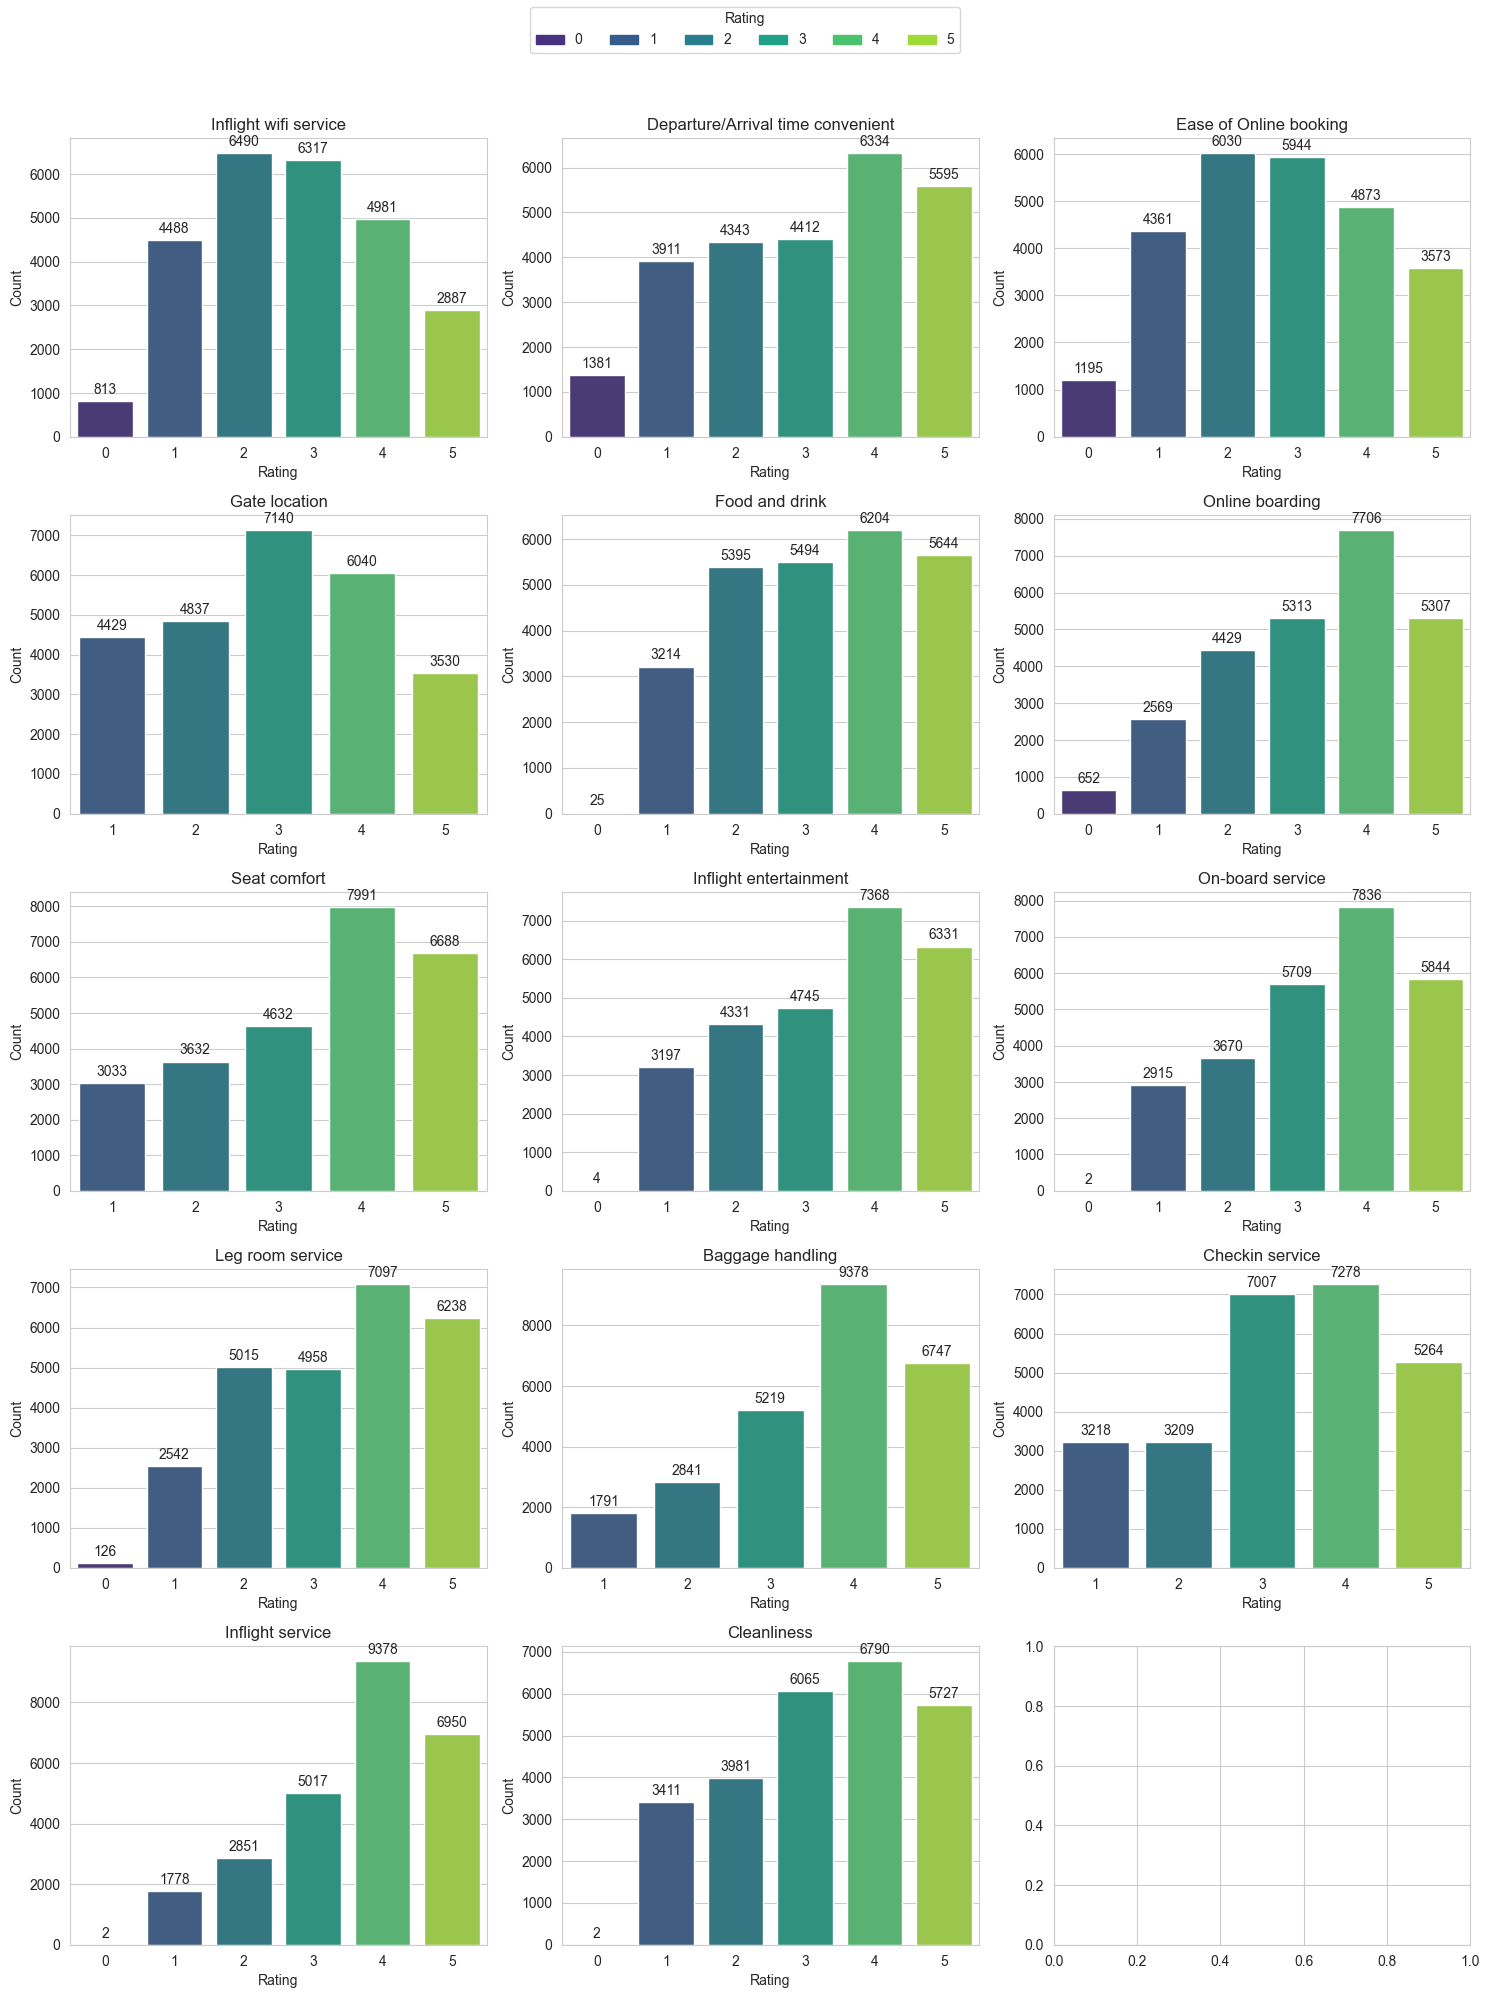

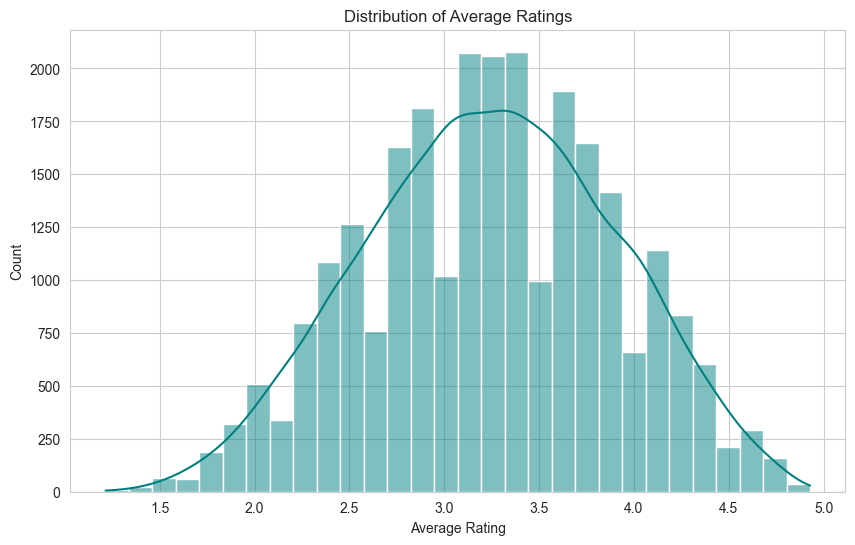

In [9]:
rating_cols = [
  'Inflight wifi service',
  'Departure/Arrival time convenient',
  'Ease of Online booking',
  'Gate location',
  'Food and drink',
  'Online boarding',
  'Seat comfort',
  'Inflight entertainment',
  'On-board service',
  'Leg room service',
  'Baggage handling',
  'Checkin service',
  'Inflight service',
  'Cleanliness'
]

rating_cols = [c for c in rating_cols if c in df.columns]

df['Average Rating'] = df[rating_cols].mean(axis=1)

sns.set_style("whitegrid")
base_palette = sns.color_palette("viridis", 6)

n = len(rating_cols)
cols = 3
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for ax, col in zip(axes, rating_cols):
  counts = df[col].value_counts().sort_index()
  
  current_palette = [base_palette[int(i)] for i in counts.index]

  sns.barplot(
    x=counts.index,
    y=counts.values,
    ax=ax,
    palette=current_palette,
    hue=counts.index,
    dodge=False,
    legend=False
  )
  ax.set_title(col)
  ax.set_xlabel("Rating")
  ax.set_ylabel("Count")
  ax.tick_params(axis='x', rotation=0)
  for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom',
        xytext=(0, 3),
        textcoords='offset points'
      )

handles = [plt.Rectangle((0, 0), 1, 1, color=base_palette[i]) for i in range(6)]
labels = [str(i) for i in range(6)]
fig.legend(handles, labels, title='Rating', loc='upper center', ncol=6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Average Rating'], kde=True, bins=30, color='teal')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

**Service Ratings:**
- **High Performers:** Services like *Baggage handling*, *Inflight service*, and *Seat comfort* tend to have higher ratings (skewed towards 4 and 5), suggesting the physical and staff-related aspects are generally well-regarded.
- **Low/Mixed Performers:** *Inflight wifi service* and *Gate location* show more variability and lower average scores, indicating these are pain points for many passengers.
- **Zero Ratings:** Some categories like *Inflight wifi service* have a noticeable count of 0s, which likely represents "Not Applicable" or a lack of service on specific flights rather than a terrible rating.

**Average Rating Distribution:**
- The distribution of average ratings is roughly bell-shaped but centered around 3.5, confirming that while most passengers have a "moderate to good" experience, there is a significant tail of poor experiences that likely drives the "neutral or dissatisfied" label.

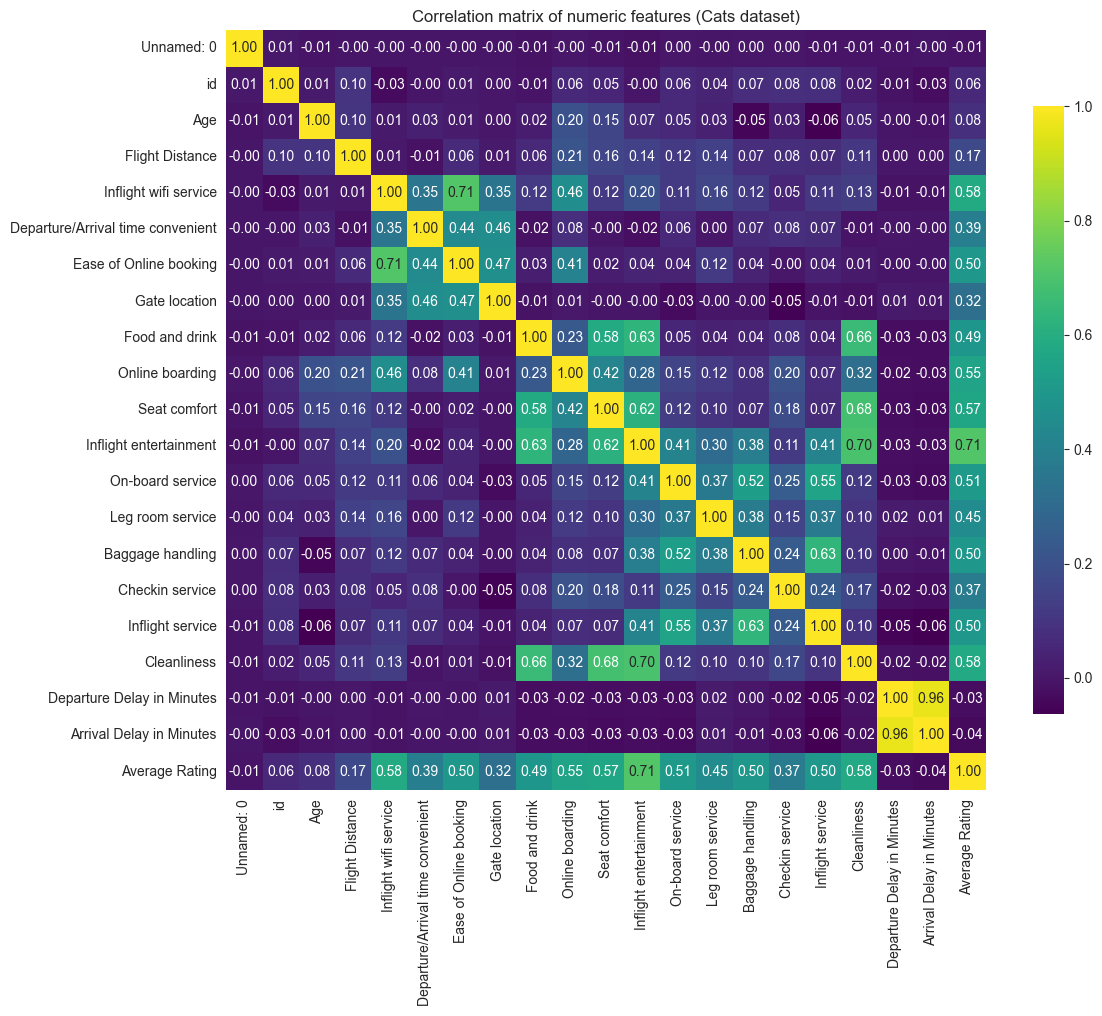

In [10]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation matrix of numeric features (Cats dataset)")
plt.tight_layout()
plt.show()

**Strong delay relationship:** Departure Delay in Minutes and Arrival Delay in Minutes are almost perfectly correlated (≈0.96), meaning departure delays almost always propagate to arrival delays.

**Service quality cluster:** Ratings like Food and drink, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, and Cleanliness show moderate to strong positive correlations with each other. This suggests that passengers tend to evaluate multiple service aspects consistently (good or bad together).

**Online experience linkage:** Ease of Online booking and Online boarding correlate well with each other and with overall service ratings, indicating that a smooth digital experience is associated with better perceptions of onboard services.

**Timing convenience:** Departure/Arrival time convenient has moderate positive correlations with other service ratings, implying that convenient flight times go hand-in-hand with better overall satisfaction with the trip.


### Outliers and NaN values

Now lets fix those null values inside the `Arrival Delay in Minutes` by fill them with 0

In [11]:
print("Nulls before:", df['Arrival Delay in Minutes'].isnull().sum())
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)
print("Nulls after:", df['Arrival Delay in Minutes'].isnull().sum())

Nulls before: 83
Nulls after: 0


Checking rating outliers if there are any

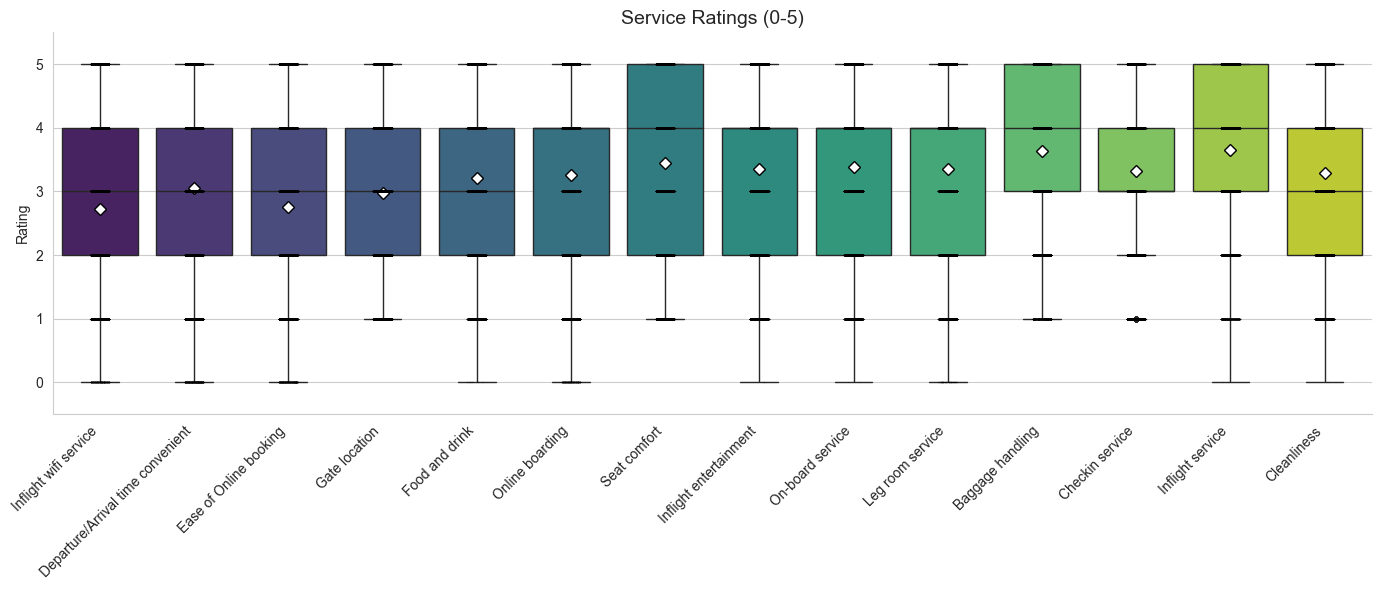

In [12]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

# use the existing rating_cols list
data = df[rating_cols]
palette = sns.color_palette("viridis", len(rating_cols))

# main boxplots with mean marker and lighter fliers
ax = sns.boxplot(
  data=data,
  palette=palette,
  showmeans=True,
  meanprops={"marker":"D", "markeredgecolor":"black", "markerfacecolor":"white"},
  flierprops={"marker":"o", "markersize":3, "alpha":0.4}
)

# lightweight jittered points to show underlying distribution
sns.stripplot(data=data, color="k", size=1, alpha=0.15, jitter=True)

ax.set_title("Service Ratings (0-5)", fontsize=14)
ax.set_ylabel("Rating")
ax.set_xlabel("")
ax.set_xticks(range(len(rating_cols)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.ylim(-0.5, 5.5)
sns.despine(trim=False)
plt.tight_layout()
plt.show()

In [13]:
df['Checkin service'].value_counts()

Checkin service
4    7278
3    7007
5    5264
1    3218
2    3209
Name: count, dtype: int64

We will not remove the outliers because they represent a substantial portion of the dataset and likely reflect genuine variability (e.g., long‑haul flights, extreme delays). Dropping them could introduce bias and distort downstream analyses. But lets check the other numerical values.

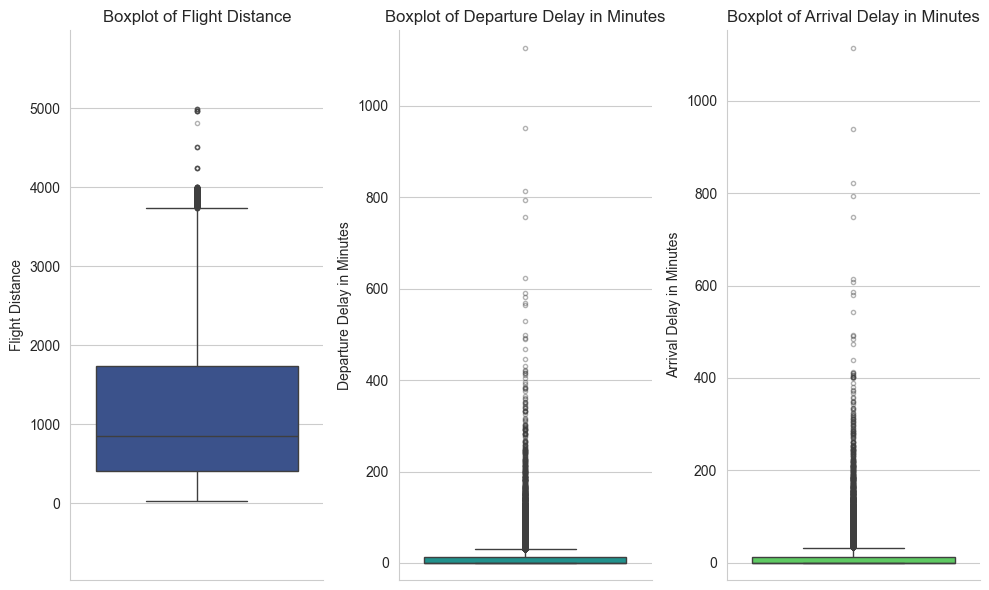

In [14]:
numerical_cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", len(numerical_cols))
for col in numerical_cols:
    plt.subplot(1, 3, numerical_cols.index(col) + 1)
    sns.boxplot(y=df[col], flierprops={"marker":"o", "markersize":3, "alpha":0.4}, boxprops={"facecolor":palette[numerical_cols.index(col)]})
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel('')
    plt.ylim(df[col].min() - (df[col].std()), df[col].max() + (df[col].std()))
    sns.despine(trim=False)
plt.tight_layout()
plt.show()


We will address outliers using the Interquartile Range (IQR) method.

In [15]:
outliers = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Checkin service']

df[outliers] = df[outliers].astype(float)

for col in outliers:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df.loc[(df[col] > upper_bound), col] = upper_bound
  df.loc[(df[col] < lower_bound), col] = lower_bound

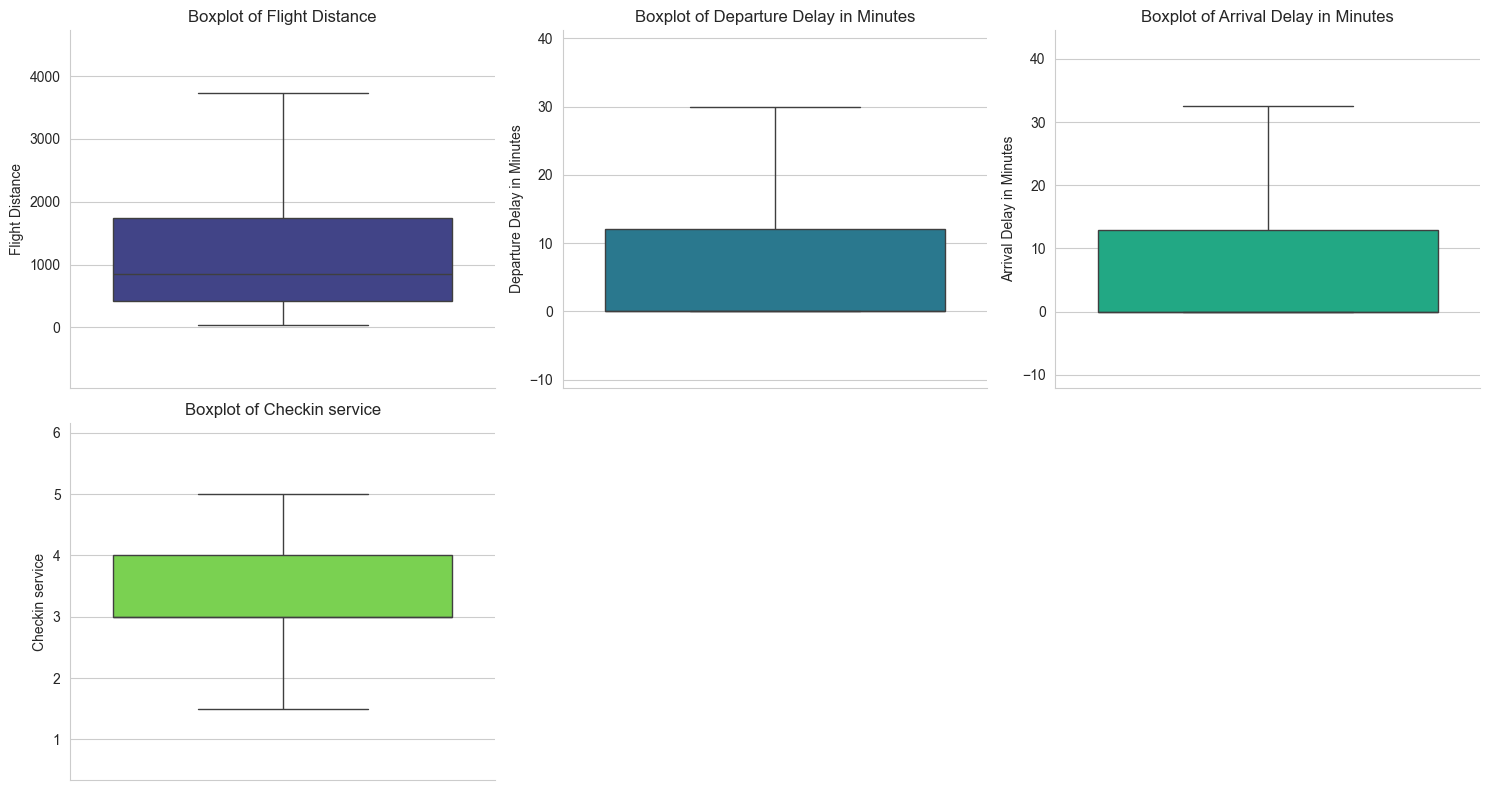

In [16]:
n = len(outliers)
cols = 3
rows = (n + cols - 1) // cols

sns.set_style("whitegrid")
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = np.array(axes).ravel()

palette = sns.color_palette("viridis", n)

for i, col in enumerate(outliers):
  ax = axes[i]
  sns.boxplot(
    y=df[col],
    ax=ax,
    flierprops={"marker":"o", "markersize":3, "alpha":0.4},
    boxprops={"facecolor": palette[i]}
  )
  ax.set_title(f'Boxplot of {col}')
  ax.set_ylabel(col)
  ax.set_xlabel('')
  ax.set_ylim(df[col].min() - df[col].std(), df[col].max() + df[col].std())
  sns.despine(ax=ax, trim=False)

# hide any unused subplots
for j in range(n, len(axes)):
  axes[j].set_visible(False)

plt.tight_layout()
plt.show()

And now we drop unnecesary columns

In [17]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True, errors='ignore')
df

Gender      Customer Type  Age   Type of Travel     Class  \
0      Female     Loyal Customer   52  Business travel       Eco   
1      Female     Loyal Customer   36  Business travel  Business   
2        Male  disloyal Customer   20  Business travel       Eco   
3        Male     Loyal Customer   44  Business travel  Business   
4      Female     Loyal Customer   49  Business travel       Eco   
...       ...                ...  ...              ...       ...   
25971    Male  disloyal Customer   34  Business travel  Business   
25972    Male     Loyal Customer   23  Business travel  Business   
25973  Female     Loyal Customer   17  Personal Travel       Eco   
25974    Male     Loyal Customer   14  Business travel  Business   
25975  Female     Loyal Customer   42  Personal Travel       Eco   

       Flight Distance  Inflight wifi service  \
0                160.0                      5   
1               2863.0                      1   
2                192.0                      2   
3               3377.0                      0   
4               1182.0                      2   
...                ...                    ...   
25971            526.0                      3   
25972            646.0                      4   
25973            828.0                      2   
25974           1127.0                      3   
25975            264.0                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4                                      3                       4   
...                                  ...                     ...   
25971                                  3                       3   
25972                                  4                       4   
25973                                  5                       1   
25974                                  3                       3   
25975                                  5                       2   

       Gate location  ...  On-board service  Leg room service  \
0                  4  ...                 5                 5   
1                  1  ...                 4                 4   
2                  4  ...                 4                 1   
3                  2  ...                 1                 1   
4                  3  ...                 2                 2   
...              ...  ...               ...               ...   
25971              1  ...                 3                 2   
25972              4  ...                 4                 5   
25973              5  ...                 4                 3   
25974              3  ...                 3                 2   
25975              5  ...                 1                 2   

       Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                     5              2.0                 5            5   
1                     4              3.0                 4            5   
2                     3              2.0                 2            2   
3                     1              3.0                 1            4   
4                     2              4.0                 2            4   
...                 ...              ...               ...          ...   
25971                 4              4.0                 5            4   
25972                 5              5.0                 5            4   
25973                 4              5.0                 4            2   
25974                 5              4.0                 5            4   
25975                 1              1.5                 1            1   

       Departure Delay in Minutes  Arrival Delay in Minutes  \
0                            30.0      

# Data preprocessing
Lets initialize dataframes for clustering

In [18]:
df_clustering = df.copy()
df_clustering_ratings = df.copy()

In [19]:
df_encoded = pd.DataFrame(index=df_clustering.index)
label_mapping = {
  'Gender': {'Female': 0, 'Male': 1},
  'satisfaction': {'satisfied': 1, 'neutral or dissatisfied': 0}
}
df_encoded['Gender'] = df_clustering['Gender'].map(label_mapping['Gender']).astype(float)
df_encoded = df_encoded.join(pd.get_dummies(df_clustering[['Customer Type', 'Type of Travel', 'Class']], dtype=float).set_index(df_clustering.index))
numerical_cols = numeric_cols
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering[numerical_cols])
df_encoded[numerical_cols] = pd.DataFrame(scaled_data, index=df_clustering.index, columns=numerical_cols)
df_encoded

Gender  Customer Type_Loyal Customer  Customer Type_disloyal Customer  \
0         0.0                           1.0                              0.0   
1         0.0                           1.0                              0.0   
2         1.0                           0.0                              1.0   
3         1.0                           1.0                              0.0   
4         0.0                           1.0                              0.0   
...       ...                           ...                              ...   
25971     1.0                           0.0                              1.0   
25972     1.0                           1.0                              0.0   
25973     0.0                           1.0                              0.0   
25974     1.0                           1.0                              0.0   
25975     0.0                           1.0                              0.0   

       Type of Travel_Business travel  Type of Travel_Personal Travel  \
0                                 1.0                             0.0   
1                                 1.0                             0.0   
2                                 1.0                             0.0   
3                                 1.0                             0.0   
4                                 1.0                             0.0   
...                               ...                             ...   
25971                             1.0                             0.0   
25972                             1.0                             0.0   
25973                             0.0                             1.0   
25974                             1.0                             0.0   
25975                             0.0                             1.0   

       Class_Business  Class_Eco  Class_Eco Plus       Age  Flight Distance  \
0                 0.0        1.0             0.0  0.817887        -1.041795   
1                 1.0        0.0             0.0 -0.239238         1.691566   
2                 0.0        1.0             0.0 -1.296363        -1.009435   
3                 1.0        0.0             0.0  0.289325         2.211339   
4                 0.0        1.0             0.0  0.619676        -0.008315   
...               ...        ...             ...       ...              ...   
25971             1.0        0.0             0.0 -0.371378        -0.671684   
25972             1.0        0.0             0.0 -1.098152        -0.550336   
25973             0.0        1.0             0.0 -1.494573        -0.366292   
25974             1.0        0.0             0.0 -1.692784        -0.063933   
25975             0.0        1.0             0.0  0.157184        -0.936626   

       Departure Delay in Minutes  Arrival Delay in Minutes  
0                        2.033492                  2.050370  
1                       -0.656169                 -0.659439  
2                       -0.656169                 -0.659439  
3                       -0.656169                 -0.159166  
4                       -0.656169                  1.008136  
...                           ...                       ...  
25971                   -0.656169                 -0.659439  
25972                   -0.656169                 -0.659439  
25973                   -0.656169                 -0.659439  
25974                   -0.656169                 -0.659439  
25975                   -0.656169                 -0.659439  

[25976 rows x 12 columns]

We perform feature encoding for the general passenger attributes. `Gender` is binary encoded, while `Customer Type`, `Type of Travel`, and `Class` are one-hot encoded. Numerical features are standardized using `StandardScaler`.

In [20]:
df_encoded_ratings = pd.DataFrame(index=df_clustering_ratings.index)
df_encoded_ratings['satisfaction'] = df_clustering_ratings['satisfaction'].map(label_mapping['satisfaction']).astype(float)
rating_cols = rating_cols + ['Average Rating']
scaled_data_ratings = scaler.fit_transform(df_clustering_ratings[rating_cols])
df_encoded_ratings[rating_cols] = pd.DataFrame(scaled_data_ratings, index=df_clustering_ratings.index, columns=rating_cols)
df_encoded_ratings

satisfaction  Inflight wifi service  Departure/Arrival time convenient  \
0               1.0               1.703853                           0.621641   
1               1.0              -1.291598                          -1.334871   
2               0.0              -0.542735                          -1.987042   
3               1.0              -2.040460                          -1.987042   
4               1.0              -0.542735                          -0.030530   
...             ...                    ...                                ...   
25971           0.0               0.206128                          -0.030530   
25972           1.0               0.954990                           0.621641   
25973           0.0              -0.542735                           1.273812   
25974           1.0               0.206128                          -0.030530   
25975           0.0              -0.542735                           1.273812   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                    0.172143       0.797831       -0.161739         0.544692   
1                    0.172143      -1.542065        1.340348         0.544692   
2                   -0.535609       0.797831       -0.912783        -0.930768   
3                   -1.951114      -0.762100       -0.161739         0.544692   
4                    0.879895       0.017866        0.589304        -1.668498   
...                       ...            ...             ...              ...   
25971                0.172143      -1.542065        0.589304        -0.193038   
25972                0.879895       0.797831        0.589304         0.544692   
25973               -1.243362       1.577797       -0.912783        -1.668498   
25974                0.172143       0.017866        0.589304         0.544692   
25975               -0.535609       1.577797        0.589304        -0.930768   

       Seat comfort  Inflight entertainment  On-board service  \
0         -0.340303                1.227138          1.259170   
1          1.174774                0.479907          0.479178   
2         -1.097842               -1.014556          0.479178   
3          0.417235               -1.761787         -1.860800   
4         -1.097842               -1.014556         -1.080807   
...             ...                     ...               ...   
25971      0.417235                0.479907         -0.300815   
25972      0.417235                0.479907          0.479178   
25973     -1.097842               -1.014556          0.479178   
25974      0.417235                0.479907         -0.300815   
25975     -1.097842               -1.761787         -1.860800   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
0              1.250974          1.161716        -1.183677          1.144063   
1              0.492730          0.311739        -0.323519          0.297077   
2             -1.782001         -0.538238        -1.183677         -1.396893   
3             -1.782001         -2.238193        -0.323519         -2.243878   
4             -1.023758         -1.388216         0.536638         -1.396893   
...                 ...               ...              ...               ...   
25971         -1.023758          0.311739         0.536638          1.144063   
25972          1.250974          1.161716         1.396795          1.144063   
25973         -0.265514          0.311739         1.396795          0.297077   
25974         -1.023758          1.161716         0.536638          1.144063   
25975         -1.023758         -2.238193        -1.613755         -2.243878   

       Cleanliness  Average Rating  
0         1.298998        1.360033  
1         1.298998        0.279944  
2        -0.974927       -1.664218  
3         0.541023       -2.204263  
4         0.541023       -0.908155  
...            ...             ...  
25971     0.541023        0.171935  
25972     0.541023     

We perform similar preprocessing for the ratings-focused dataset. The `satisfaction` target is binary encoded, and all service rating columns (including the calculated `Average Rating`) are standardized using `StandardScaler` to ensure they contribute equally during clustering.

In [21]:
all_features_encoded = pd.concat([df_encoded, df_encoded_ratings], axis=1)
all_features_encoded

Gender  Customer Type_Loyal Customer  Customer Type_disloyal Customer  \
0         0.0                           1.0                              0.0   
1         0.0                           1.0                              0.0   
2         1.0                           0.0                              1.0   
3         1.0                           1.0                              0.0   
4         0.0                           1.0                              0.0   
...       ...                           ...                              ...   
25971     1.0                           0.0                              1.0   
25972     1.0                           1.0                              0.0   
25973     0.0                           1.0                              0.0   
25974     1.0                           1.0                              0.0   
25975     0.0                           1.0                              0.0   

       Type of Travel_Business travel  Type of Travel_Personal Travel  \
0                                 1.0                             0.0   
1                                 1.0                             0.0   
2                                 1.0                             0.0   
3                                 1.0                             0.0   
4                                 1.0                             0.0   
...                               ...                             ...   
25971                             1.0                             0.0   
25972                             1.0                             0.0   
25973                             0.0                             1.0   
25974                             1.0                             0.0   
25975                             0.0                             1.0   

       Class_Business  Class_Eco  Class_Eco Plus       Age  Flight Distance  \
0                 0.0        1.0             0.0  0.817887        -1.041795   
1                 1.0        0.0             0.0 -0.239238         1.691566   
2                 0.0        1.0             0.0 -1.296363        -1.009435   
3                 1.0        0.0             0.0  0.289325         2.211339   
4                 0.0        1.0             0.0  0.619676        -0.008315   
...               ...        ...             ...       ...              ...   
25971             1.0        0.0             0.0 -0.371378        -0.671684   
25972             1.0        0.0             0.0 -1.098152        -0.550336   
25973             0.0        1.0             0.0 -1.494573        -0.366292   
25974             1.0        0.0             0.0 -1.692784        -0.063933   
25975             0.0        1.0             0.0  0.157184        -0.936626   

       ...  Online boarding  Seat comfort  Inflight entertainment  \
0      ...         0.544692     -0.340303                1.227138   
1      ...         0.544692      1.174774                0.479907   
2      ...        -0.930768     -1.097842               -1.014556   
3      ...         0.544692      0.417235               -1.761787   
4      ...        -1.668498     -1.097842               -1.014556   
...    ...              ...           ...                     ...   
25971  ...        -0.193038      0.417235                0.479907   
25972  ...         0.544692      0.417235                0.479907   
25973  ...        -1.668498     -1.097842               -1.014556   
25974  ...         0.544692      0.417235                0.479907   
25975  ...        -0.930768     -1.097842               -1.761787   

       On-board service  Leg room service  Baggage handling  Checkin service  \
0              1.259170          1.250974          1.161716        -1.183677   
1              0.479178          0.492730          0.311739        -0.323519   
2              0.479178         -1.782001         -0.538238        -1.183677   
3             -1.860800         -1.782001         -2.238193        -0.3

We combine the encoded general features and the encoded ratings into a single dataframe `all_features_encoded` to prepare for potential unified analysis or modeling tasks that require both sets of information.

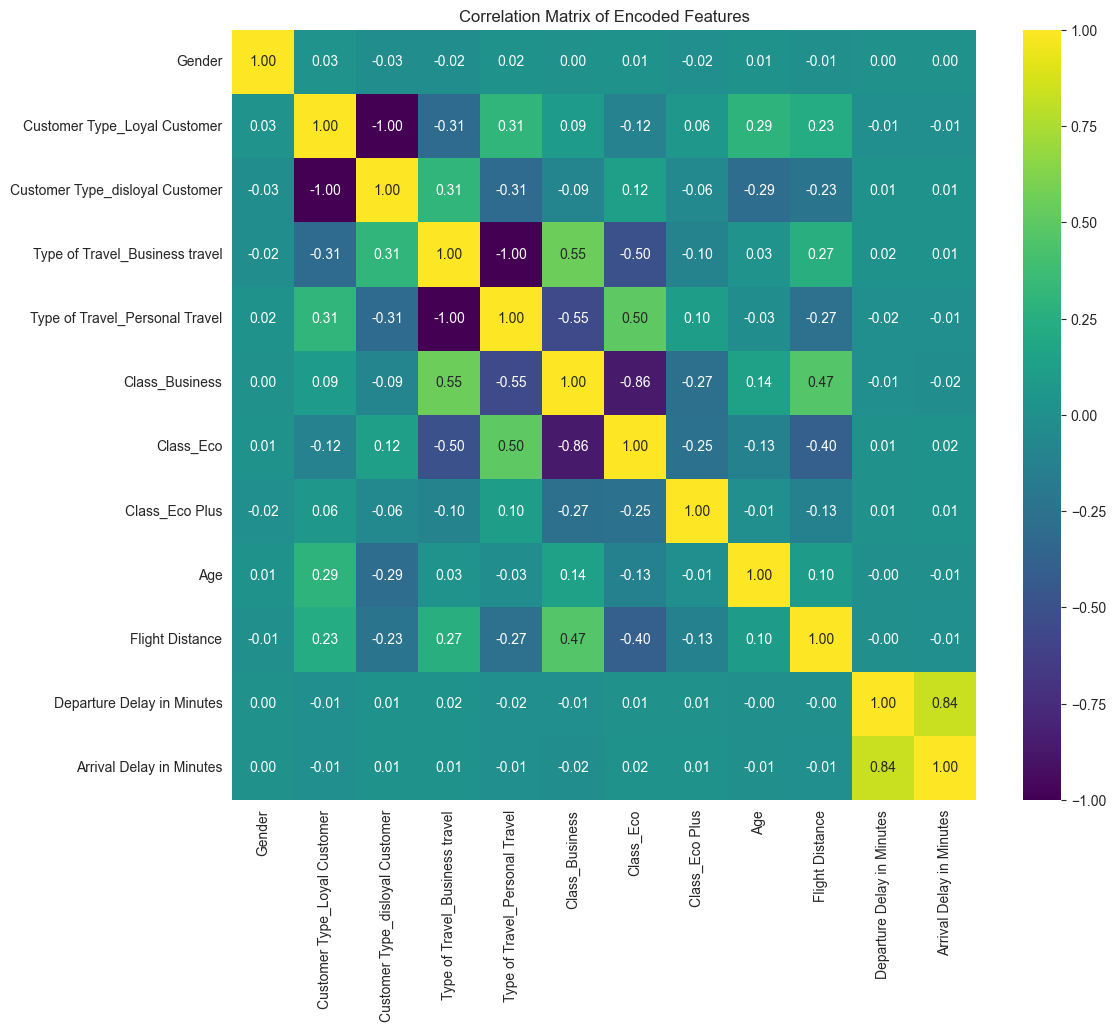

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix of Encoded Features")
plt.show()

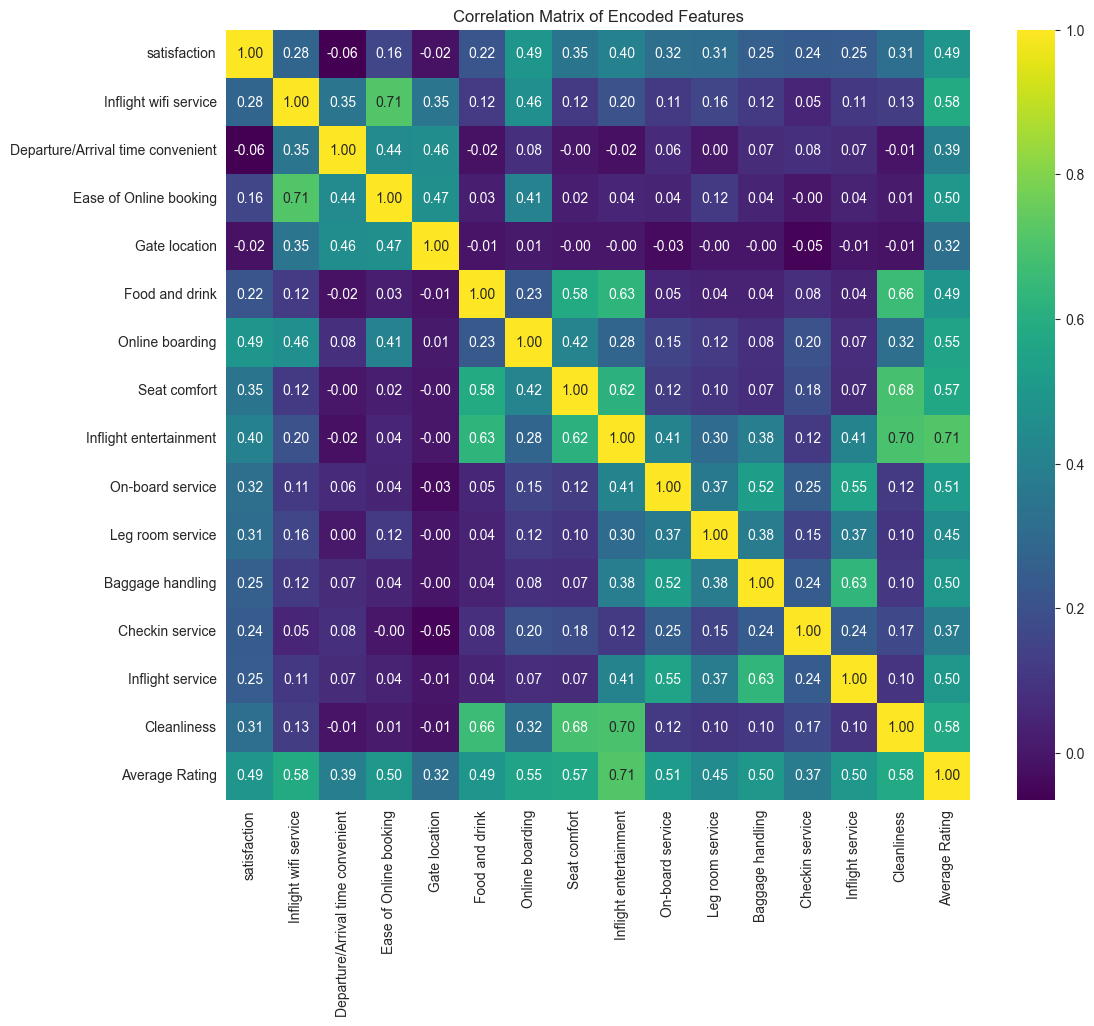

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded_ratings.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix of Encoded Features")
plt.show()

# Clustering
## K-Means - Travel Profile

In [24]:
X = df_encoded.copy()
X

Gender  Customer Type_Loyal Customer  Customer Type_disloyal Customer  \
0         0.0                           1.0                              0.0   
1         0.0                           1.0                              0.0   
2         1.0                           0.0                              1.0   
3         1.0                           1.0                              0.0   
4         0.0                           1.0                              0.0   
...       ...                           ...                              ...   
25971     1.0                           0.0                              1.0   
25972     1.0                           1.0                              0.0   
25973     0.0                           1.0                              0.0   
25974     1.0                           1.0                              0.0   
25975     0.0                           1.0                              0.0   

       Type of Travel_Business travel  Type of Travel_Personal Travel  \
0                                 1.0                             0.0   
1                                 1.0                             0.0   
2                                 1.0                             0.0   
3                                 1.0                             0.0   
4                                 1.0                             0.0   
...                               ...                             ...   
25971                             1.0                             0.0   
25972                             1.0                             0.0   
25973                             0.0                             1.0   
25974                             1.0                             0.0   
25975                             0.0                             1.0   

       Class_Business  Class_Eco  Class_Eco Plus       Age  Flight Distance  \
0                 0.0        1.0             0.0  0.817887        -1.041795   
1                 1.0        0.0             0.0 -0.239238         1.691566   
2                 0.0        1.0             0.0 -1.296363        -1.009435   
3                 1.0        0.0             0.0  0.289325         2.211339   
4                 0.0        1.0             0.0  0.619676        -0.008315   
...               ...        ...             ...       ...              ...   
25971             1.0        0.0             0.0 -0.371378        -0.671684   
25972             1.0        0.0             0.0 -1.098152        -0.550336   
25973             0.0        1.0             0.0 -1.494573        -0.366292   
25974             1.0        0.0             0.0 -1.692784        -0.063933   
25975             0.0        1.0             0.0  0.157184        -0.936626   

       Departure Delay in Minutes  Arrival Delay in Minutes  
0                        2.033492                  2.050370  
1                       -0.656169                 -0.659439  
2                       -0.656169                 -0.659439  
3                       -0.656169                 -0.159166  
4                       -0.656169                  1.008136  
...                           ...                       ...  
25971                   -0.656169                 -0.659439  
25972                   -0.656169                 -0.659439  
25973                   -0.656169                 -0.659439  
25974                   -0.656169                 -0.659439  
25975                   -0.656169                 -0.659439  

[25976 rows x 12 columns]

We will use the `df_encoded` dataframe for K-Means clustering. This dataset focuses on the **Travel Profile** and **Operational Experience** of the passengers. We are intentionally excluding the specific service ratings (e.g., Wifi, Food, Seat Comfort) in this step. The goal is to identify natural groups based on *who* the passengers are and the *objective characteristics* of their journey.

In [25]:
clustering_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': kmeans.inertia_,
        'silhouette_score': silhouette_score(X, kmeans.fit_predict(X))
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

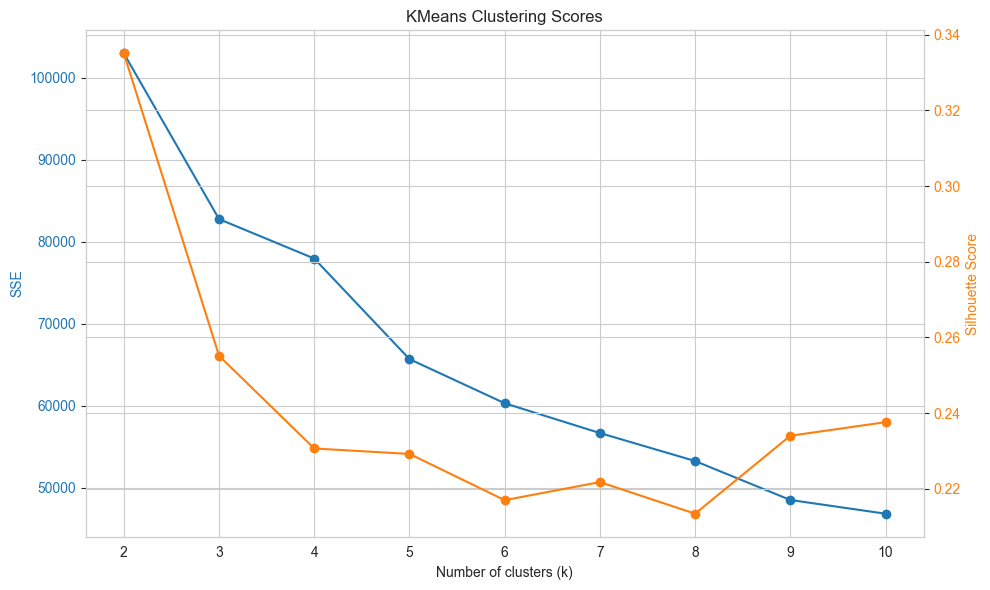

In [26]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:blue'
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('SSE', color=color)
ax1.plot(df_clustering_scores.index, df_clustering_scores['sse'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(df_clustering_scores.index, df_clustering_scores['silhouette_score'], marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('KMeans Clustering Scores')
fig.tight_layout()
plt.show()

Based on the analysis of the **Elbow Method (SSE)** and the **Silhouette Score**, we have determined that **k=3** is the optimal number of clusters for this dataset.

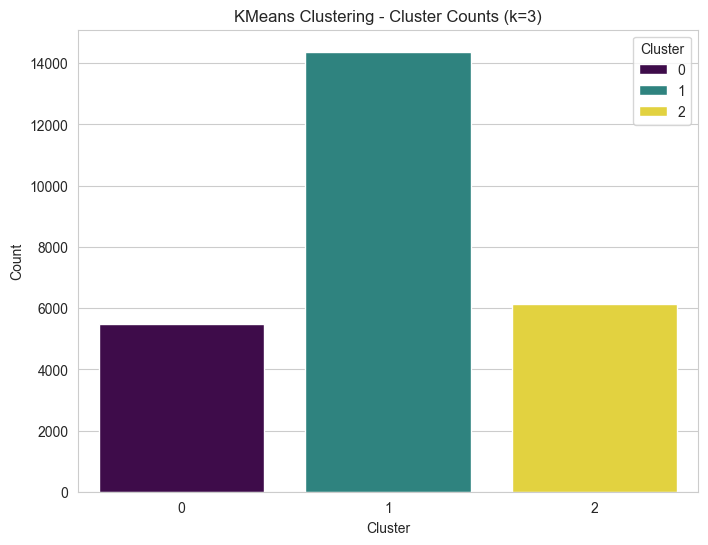

In [27]:
clustering = KMeans(n_clusters=3, random_state=42).fit(X)
clustering_count = pd.Series(clustering.labels_).value_counts()

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.barplot(x=clustering_count.index, y=clustering_count.values, palette="viridis", hue=clustering_count.index)
plt.title("KMeans Clustering - Cluster Counts (k=3)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Cluster")
plt.show()

In [28]:
df_clustering["cluster_id"] = clustering.labels_

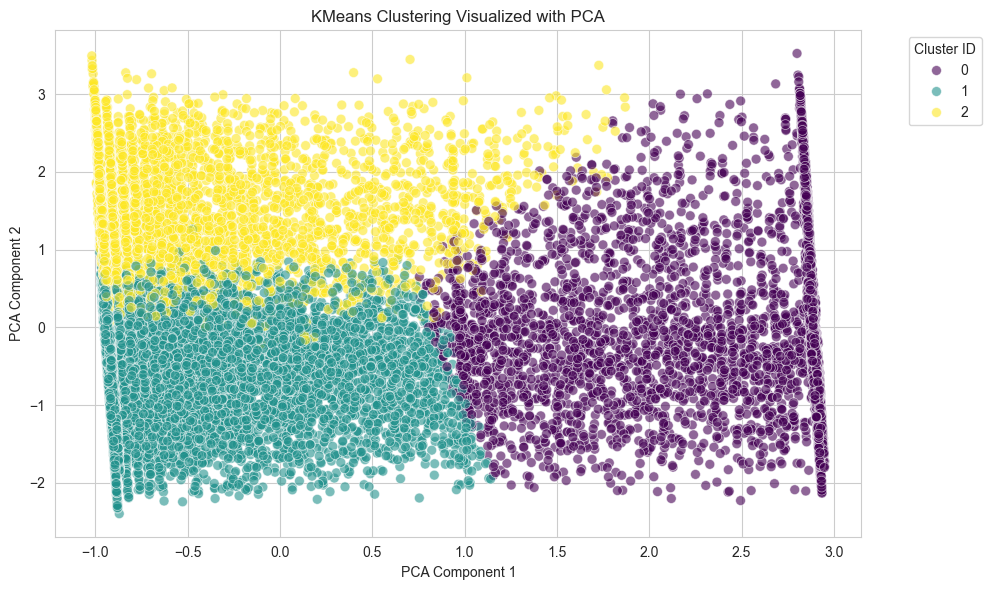

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(
  x=X_pca[:, 0], 
  y=X_pca[:, 1], 
  hue=df_clustering['cluster_id'], 
  palette='viridis',
  s=50,
  alpha=0.6
)
plt.title('KMeans Clustering Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Let's look how the age, customer type, type of flight and type of class is distribuated in the clusters

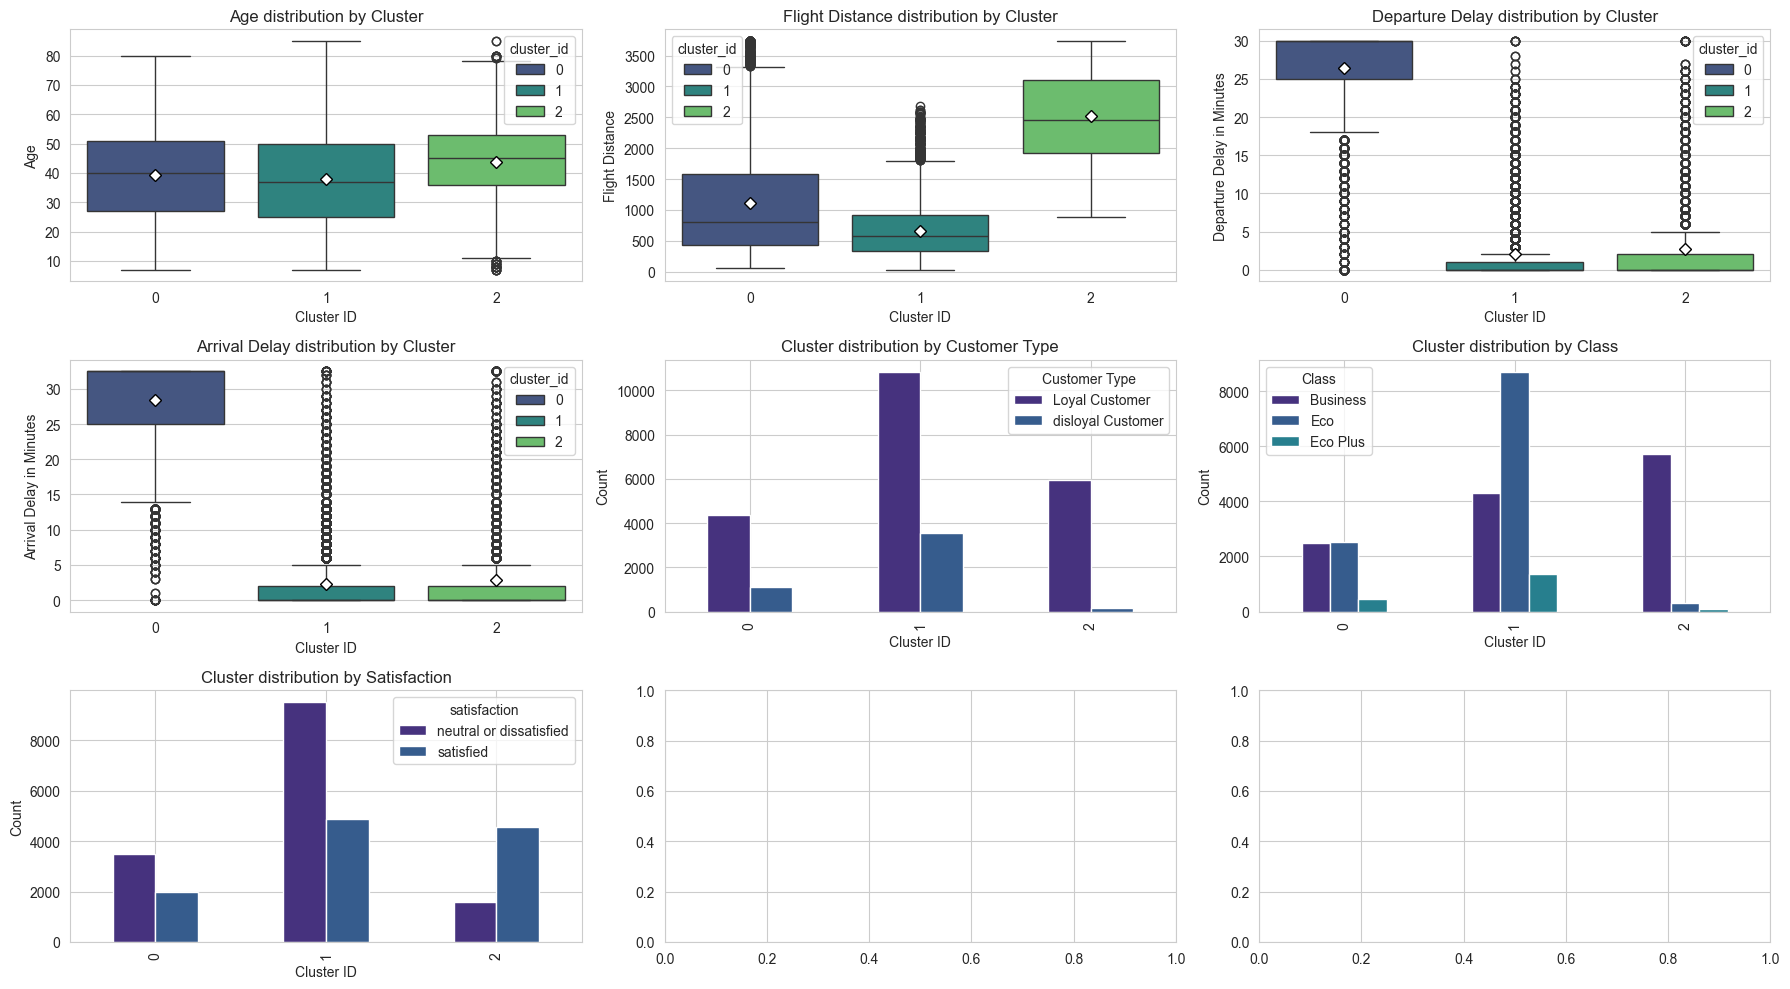

In [30]:
# ...existing code...
# Distribution of Age, Customer Type, Type of Travel and Class across clusters
cols = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
cols = [c for c in cols if c in df_clustering.columns]

sns.set_style("whitegrid")
n_clusters = df_clustering['cluster_id'].nunique()
palette = sns.color_palette("viridis")

fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.ravel()

def cluster_numeric_boxplot(ax, df, num_col, title):
    sns.boxplot(
        data=df,
        x='cluster_id', y=num_col,
        palette=sns.color_palette("viridis", df['cluster_id'].nunique()),
        ax=ax, showmeans=True,
        meanprops={"marker": "D", "markeredgecolor": "black", "markerfacecolor": "white"},
        hue='cluster_id'
    )
    ax.set_title(title)
    ax.set_xlabel("Cluster ID")
    ax.set_ylabel(num_col)


# helper to build "cluster on x, categories as bars" plots
def cluster_category_barplot(ax, df, cat_col, title):
    ctab = pd.crosstab(df['cluster_id'], df[cat_col])
    ctab.plot(kind='bar', ax=ax, color=palette[:len(ctab.columns)])
    ax.set_title(title)
    ax.set_xlabel("Cluster ID")
    ax.set_ylabel("Count")
    ax.legend(title=cat_col)
  
# 1) Age vs cluster
cluster_numeric_boxplot(axes[0], df_clustering, 'Age',
                         "Age distribution by Cluster")
# 2) Flight Distance vs cluster
cluster_numeric_boxplot(axes[1], df_clustering, 'Flight Distance',
                         "Flight Distance distribution by Cluster")
# 3) Departure Delay vs cluster
cluster_numeric_boxplot(axes[2], df_clustering, 'Departure Delay in Minutes',
                          "Departure Delay distribution by Cluster")

# 4) Arrival Delay vs cluster
cluster_numeric_boxplot(axes[3], df_clustering, 'Arrival Delay in Minutes',
                          "Arrival Delay distribution by Cluster")

# 5) Customer Type vs cluster
cluster_category_barplot(axes[4], df_clustering, 'Customer Type',
                         "Cluster distribution by Customer Type")

# 6) Class vs cluster
cluster_category_barplot(axes[5], df_clustering, 'Class',
                         "Cluster distribution by Class")
# 7) Satisfaction vs cluster
cluster_category_barplot(axes[6], df_clustering, 'satisfaction',
                         "Cluster distribution by Satisfaction")

plt.tight_layout()
plt.show()

**Cluster 0: The Disrupted Passenger**

This cluster is defined almost entirely by operational failure. While the passengers here represent a mix of Economy and Business class travelers with varying levels of loyalty, they share a single, frustrating trait: significant delays. The data shows that the median departure delay for this group is over 25 minutes, with arrival delays mirroring that figure. Essentially, this cluster captures everyone who had a "bad day" with the airline, regardless of their ticket type or distance flown. Because this group contains a significant number of "Loyal" customers and Business class flyers, this segment represents a high-priority service recovery opportunity to prevent churn.

**Cluster 1: The Short-Haul Economy Commuter**

This group represents the high-volume, budget-conscious backbone of your operations. These passengers are the youngest demographic (median age ~38) and fly the shortest routes, typically averaging around 600 miles. Their profile is overwhelmingly dominated by Economy class bookings. Critically, this cluster contains the highest proportion of "disloyal" customers, suggesting that many people in this group are likely price-shopping for quick trips rather than remaining committed to the brand. However, unlike Cluster 0, they experienced generally smooth operations with almost zero delays, meaning their satisfaction will likely depend on the in-flight product rather than punctuality.

**Cluster 2: The Premium Long-Haul VIP**

This cluster remains your "ideal" customer segment. These are the oldest and most experienced travelers (median age ~45) who fly the longest routes, with a median distance of roughly 2,500 miles. They are almost exclusively Business class passengers and are overwhelmingly "Loyal" to the airline. The data indicates that this high-value group was shielded from the operational issues that plagued Cluster 0, enjoying near-zero delays. This group represents the "Golden Quadrant": high revenue (long-haul Business), high loyalty, and a high-quality service experience.

## Agglomerative - Service experience & Satisfaction

In [31]:
X = df_encoded_ratings.copy()
X

satisfaction  Inflight wifi service  Departure/Arrival time convenient  \
0               1.0               1.703853                           0.621641   
1               1.0              -1.291598                          -1.334871   
2               0.0              -0.542735                          -1.987042   
3               1.0              -2.040460                          -1.987042   
4               1.0              -0.542735                          -0.030530   
...             ...                    ...                                ...   
25971           0.0               0.206128                          -0.030530   
25972           1.0               0.954990                           0.621641   
25973           0.0              -0.542735                           1.273812   
25974           1.0               0.206128                          -0.030530   
25975           0.0              -0.542735                           1.273812   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                    0.172143       0.797831       -0.161739         0.544692   
1                    0.172143      -1.542065        1.340348         0.544692   
2                   -0.535609       0.797831       -0.912783        -0.930768   
3                   -1.951114      -0.762100       -0.161739         0.544692   
4                    0.879895       0.017866        0.589304        -1.668498   
...                       ...            ...             ...              ...   
25971                0.172143      -1.542065        0.589304        -0.193038   
25972                0.879895       0.797831        0.589304         0.544692   
25973               -1.243362       1.577797       -0.912783        -1.668498   
25974                0.172143       0.017866        0.589304         0.544692   
25975               -0.535609       1.577797        0.589304        -0.930768   

       Seat comfort  Inflight entertainment  On-board service  \
0         -0.340303                1.227138          1.259170   
1          1.174774                0.479907          0.479178   
2         -1.097842               -1.014556          0.479178   
3          0.417235               -1.761787         -1.860800   
4         -1.097842               -1.014556         -1.080807   
...             ...                     ...               ...   
25971      0.417235                0.479907         -0.300815   
25972      0.417235                0.479907          0.479178   
25973     -1.097842               -1.014556          0.479178   
25974      0.417235                0.479907         -0.300815   
25975     -1.097842               -1.761787         -1.860800   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
0              1.250974          1.161716        -1.183677          1.144063   
1              0.492730          0.311739        -0.323519          0.297077   
2             -1.782001         -0.538238        -1.183677         -1.396893   
3             -1.782001         -2.238193        -0.323519         -2.243878   
4             -1.023758         -1.388216         0.536638         -1.396893   
...                 ...               ...              ...               ...   
25971         -1.023758          0.311739         0.536638          1.144063   
25972          1.250974          1.161716         1.396795          1.144063   
25973         -0.265514          0.311739         1.396795          0.297077   
25974         -1.023758          1.161716         0.536638          1.144063   
25975         -1.023758         -2.238193        -1.613755         -2.243878   

       Cleanliness  Average Rating  
0         1.298998        1.360033  
1         1.298998        0.279944  
2        -0.974927       -1.664218  
3         0.541023       -2.204263  
4         0.541023       -0.908155  
...            ...             ...  
25971     0.541023        0.171935  
25972     0.541023     

We will use the `df_encoded_ratings` dataframe for Agglomerative Clustering. This dataset focuses on the **Service Experience** and **Satisfaction** of the passengers. We are intentionally excluding the travel profile (e.g., Age, Flight Distance, Class) in this step. The goal is to identify natural groups based on *how* the passengers rated the service and their *subjective experience*.

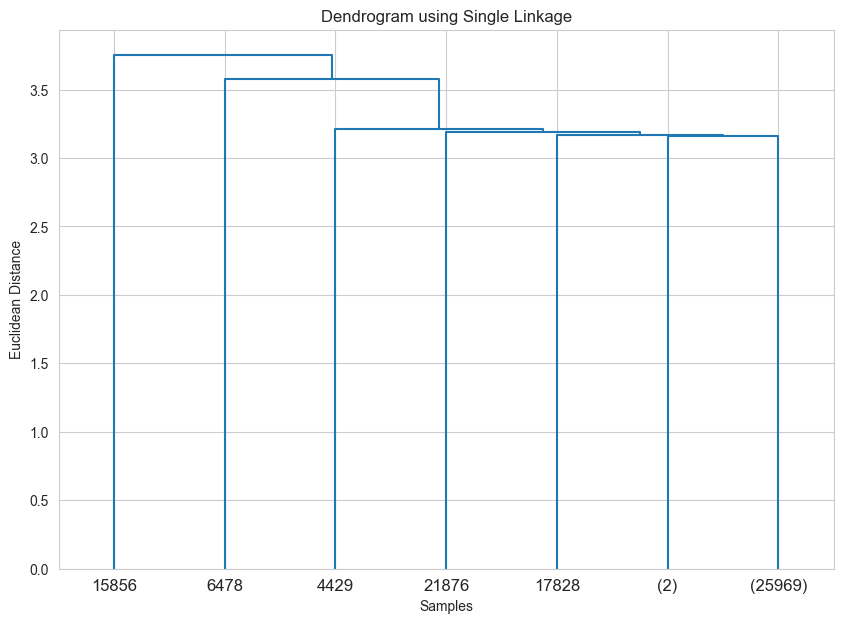

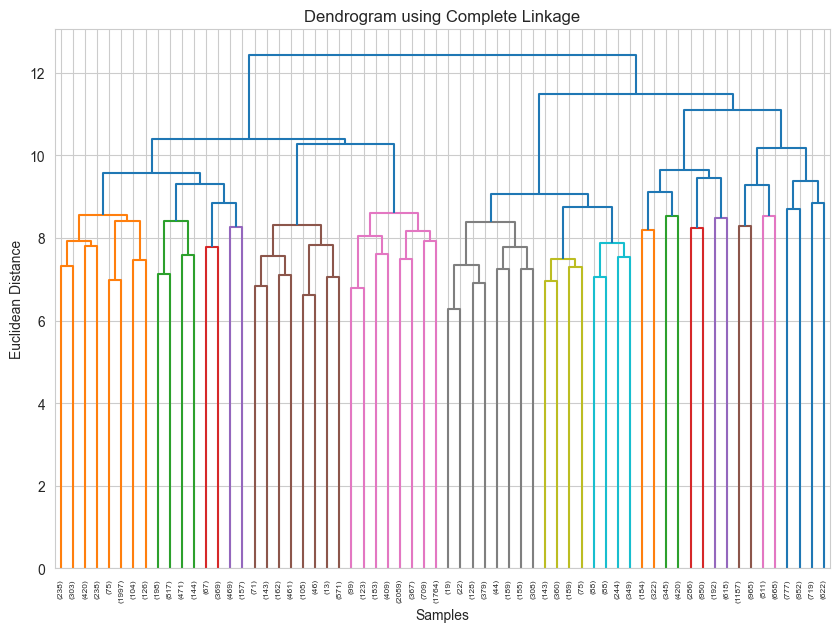

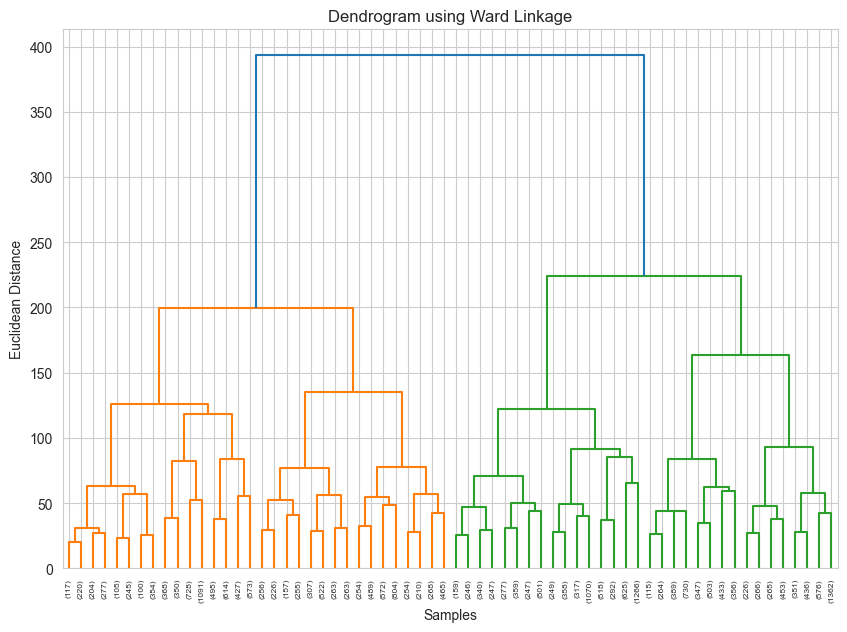

In [32]:
plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='single'), truncate_mode='level', p=5)
plt.title('Dendrogram using Single Linkage')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()
plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='complete'), truncate_mode='level', p=5)
plt.title('Dendrogram using Complete Linkage')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()
plt.figure(figsize=(10, 7))
dendrogram(linkage(X, method='ward'), truncate_mode='level', p=5)
plt.title('Dendrogram using Ward Linkage')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

Based on the dendrograms, the Ward linkage method produces the most balanced and distinct clusters. So we will proceed with Agglomerative Clustering using Ward linkage and k=4.

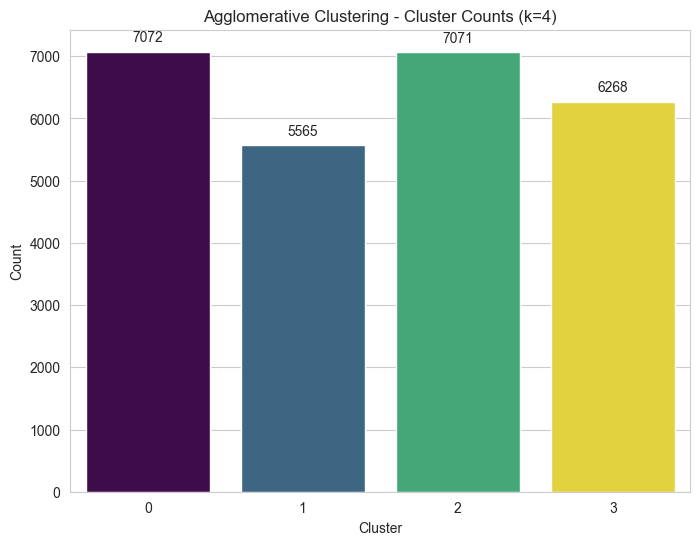

In [33]:
clustering = AgglomerativeClustering(linkage='ward', distance_threshold=None, n_clusters=4)
clustering = clustering.fit(X)
clustering_count = pd.Series(clustering.labels_).value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.barplot(x=clustering_count.index, y=clustering_count.values, palette="viridis", hue=clustering_count.index, dodge=False, legend=False)
ax.set_title("Agglomerative Clustering - Cluster Counts (k=4)")
ax.set_xlabel("Cluster")
ax.set_ylabel("Count")

for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
        ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()

In [34]:
df_clustering["cluster_id"] = clustering.labels_

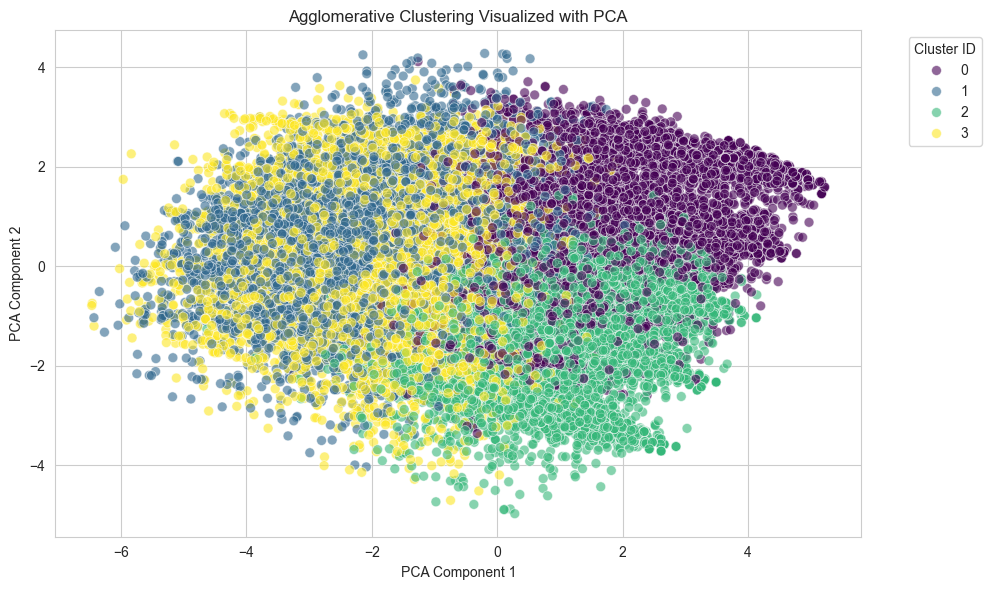

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(
  x=X_pca[:, 0], 
  y=X_pca[:, 1], 
  hue=df_clustering['cluster_id'], 
  palette='viridis',
  s=50,
  alpha=0.6
)
plt.title('Agglomerative Clustering Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


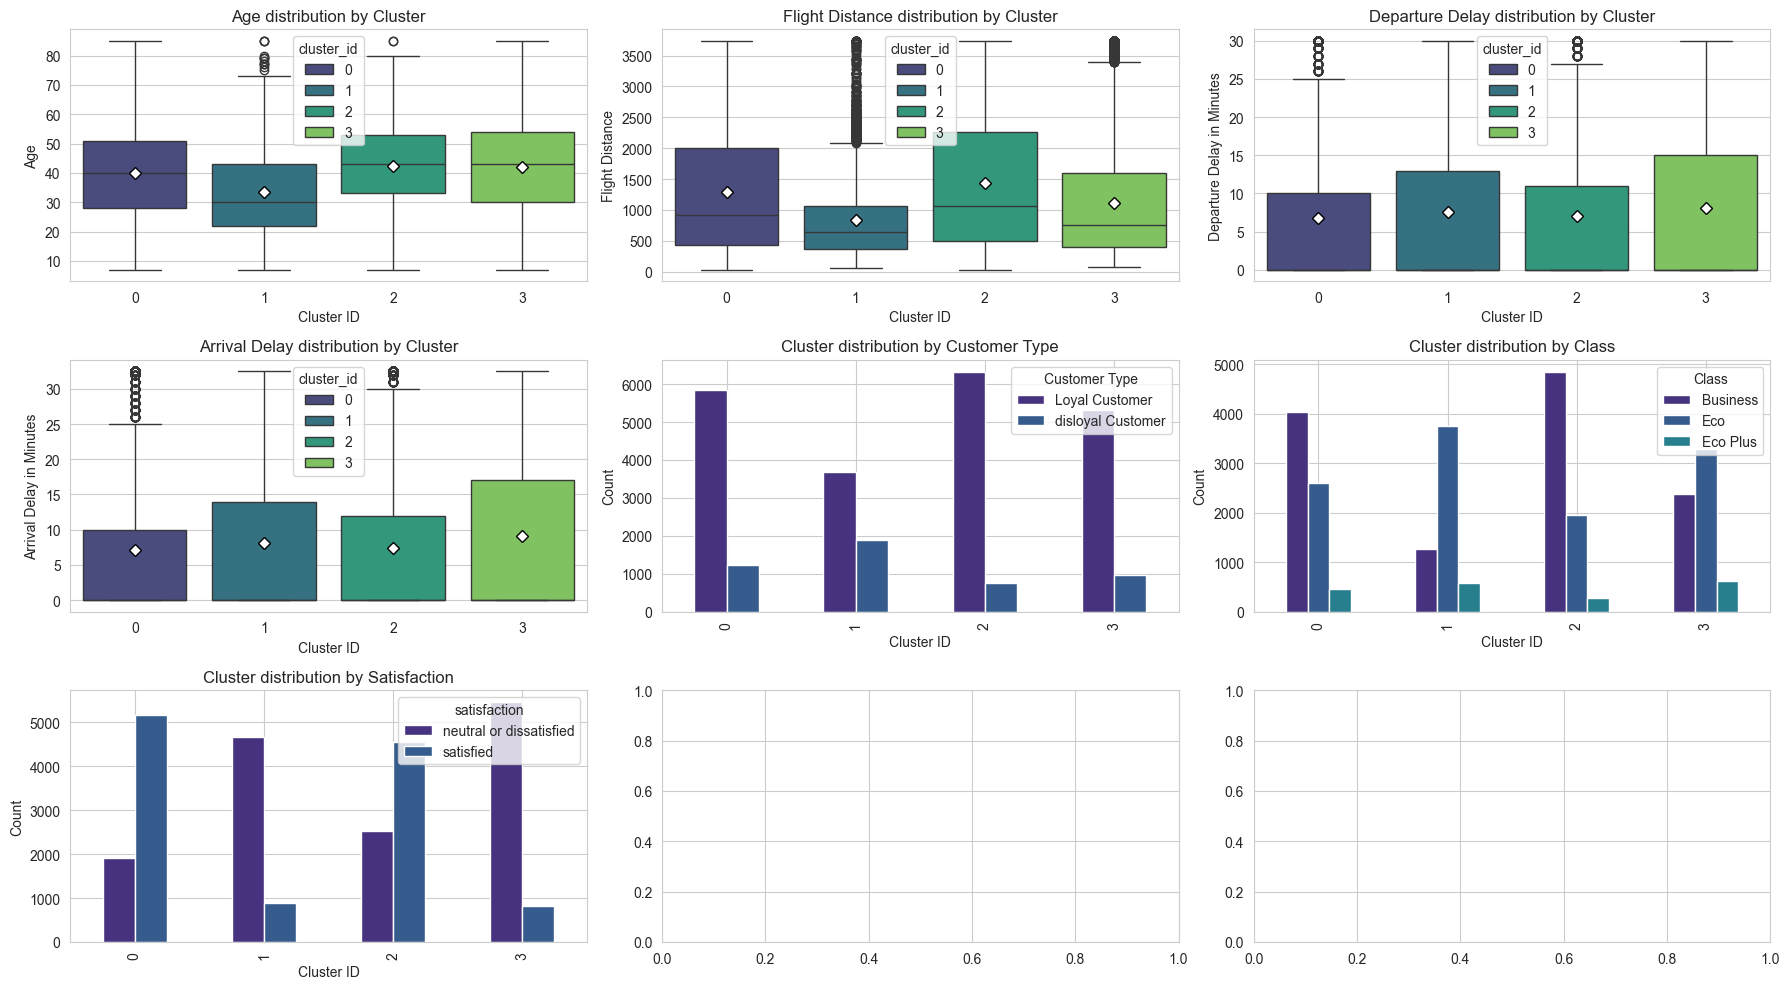

In [36]:
cols = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
cols = [c for c in cols if c in df_clustering.columns]

sns.set_style("whitegrid")
n_clusters = df_clustering['cluster_id'].nunique()
palette = sns.color_palette("viridis")

fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.ravel()

def cluster_numeric_boxplot(ax, df, num_col, title):
    sns.boxplot(
        data=df,
        x='cluster_id', y=num_col,
        palette=sns.color_palette("viridis", df['cluster_id'].nunique()),
        ax=ax, showmeans=True,
        meanprops={"marker": "D", "markeredgecolor": "black", "markerfacecolor": "white"},
        hue='cluster_id'
    )
    ax.set_title(title)
    ax.set_xlabel("Cluster ID")
    ax.set_ylabel(num_col)


def cluster_category_barplot(ax, df, cat_col, title):
    ctab = pd.crosstab(df['cluster_id'], df[cat_col])
    ctab.plot(kind='bar', ax=ax, color=palette[:len(ctab.columns)])
    ax.set_title(title)
    ax.set_xlabel("Cluster ID")
    ax.set_ylabel("Count")
    ax.legend(title=cat_col)
  
cluster_numeric_boxplot(axes[0], df_clustering, 'Age',
                         "Age distribution by Cluster")
cluster_numeric_boxplot(axes[1], df_clustering, 'Flight Distance',
                         "Flight Distance distribution by Cluster")
cluster_numeric_boxplot(axes[2], df_clustering, 'Departure Delay in Minutes',
                          "Departure Delay distribution by Cluster")
cluster_numeric_boxplot(axes[3], df_clustering, 'Arrival Delay in Minutes',
                          "Arrival Delay distribution by Cluster")
cluster_category_barplot(axes[4], df_clustering, 'Customer Type',
                         "Cluster distribution by Customer Type")
cluster_category_barplot(axes[5], df_clustering, 'Class',
                         "Cluster distribution by Class")
cluster_category_barplot(axes[6], df_clustering, 'satisfaction',
                         "Cluster distribution by Satisfaction")

plt.tight_layout()
plt.show()

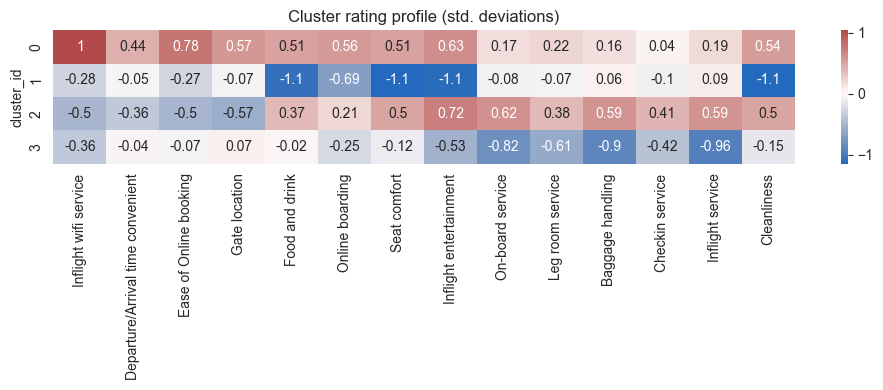

In [37]:
rating_cols_no_avg = [c for c in rating_cols if c != 'Average Rating' and c in df_clustering.columns]

rating_stats = (
    df_clustering
      .groupby('cluster_id')[rating_cols_no_avg]
      .agg(['mean','median'])
)
global_mean = df_clustering[rating_cols_no_avg].mean()
global_std  = df_clustering[rating_cols_no_avg].std()

deviation = (
    df_clustering
      .groupby('cluster_id')[rating_cols_no_avg]
      .mean()
      .subtract(global_mean)
      .divide(global_std) 
      .round(2)
)

plt.figure(figsize=(10,4))
sns.heatmap(deviation, annot=True, cmap='vlag', center=0)
plt.title("Cluster rating profile (std. deviations)")
plt.tight_layout()
plt.show()


**Cluster 0: High-Service Omni Loyal**  
Highest standardized scores almost everywhere (notably inflight wifi, entertainment, overall service & cleanliness). Likely skewed to loyal, higher fare (Business/Eco Plus) travelers. Retain and upsell.

**Cluster 1: Broad Service Failure / Highly Dissatisfied**  
Extreme negative deviations across core onboard and comfort attributes (seat, entertainment, food, boarding, cleanliness, inflight service). Represents acute service breakdown episodes. Priority recovery segment (target service remediation & reassurance).

**Cluster 2: Comfort & Cabin Strength, Ground Weakness**  
Strong positives in seat comfort, leg room, entertainment, check‑in, baggage handling, inflight service; below average on wifi, departure/arrival convenience, gate location. Experience good once onboard; improve pre‑flight & connectivity to raise total satisfaction.

**Cluster 3: Process & Space Pain Points**  
Mild negatives in most areas; largest deficits in leg room, check‑in, baggage handling, boarding, entertainment. Not catastrophic (less extreme than Cluster 1) but cumulatively eroding satisfaction. Operational/process improvement and cabin space optimization focus.




## DBSCAN - self implemented

In [38]:
def dbscan_scratch(X, eps, min_samples):
  data = X.values
    
  n_samples = data.shape[0]
  labels = np.full(n_samples, -1)
  visited = np.zeros(n_samples, dtype=bool)
  cluster_id = 0
  
  
  def get_neighbors(point_idx):
    distances = np.sqrt(np.sum((data - data[point_idx])**2, axis=1))
    return np.where(distances <= eps)[0]

  for i in range(n_samples):
    if visited[i]:
      continue
      
    visited[i] = True
    neighbors = get_neighbors(i)
    
    if len(neighbors) < min_samples:
      continue
    else:
      labels[i] = cluster_id
      
      seeds = list(neighbors)
    
      idx = 0
      while idx < len(seeds):
        current_point = seeds[idx]
        idx += 1
        
        if not visited[current_point]:
          visited[current_point] = True
          current_neighbors = get_neighbors(current_point)
          
          if len(current_neighbors) >= min_samples:
            seeds.extend(current_neighbors)
        
        if labels[current_point] == -1:
          labels[current_point] = cluster_id
      
      cluster_id += 1
      
  return labels

In [ ]:
X_df = df_encoded
X_df = X_df.join(all_features_encoded[['Average Rating','satisfaction']])
X_df = X_df.drop(columns=['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Gender'], errors='ignore')
X_df

Customer Type_Loyal Customer  Customer Type_disloyal Customer  \
0                               1.0                              0.0   
1                               1.0                              0.0   
2                               0.0                              1.0   
3                               1.0                              0.0   
4                               1.0                              0.0   
...                             ...                              ...   
25971                           0.0                              1.0   
25972                           1.0                              0.0   
25973                           1.0                              0.0   
25974                           1.0                              0.0   
25975                           1.0                              0.0   

       Type of Travel_Business travel  Type of Travel_Personal Travel  \
0                                 1.0                             0.0   
1                                 1.0                             0.0   
2                                 1.0                             0.0   
3                                 1.0                             0.0   
4                                 1.0                             0.0   
...                               ...                             ...   
25971                             1.0                             0.0   
25972                             1.0                             0.0   
25973                             0.0                             1.0   
25974                             1.0                             0.0   
25975                             0.0                             1.0   

       Class_Business  Class_Eco  Class_Eco Plus       Age  Flight Distance  \
0                 0.0        1.0             0.0  0.817887        -1.780295   
1                 1.0        0.0             0.0 -0.239238         1.368496   
2                 0.0        1.0             0.0 -1.296363        -1.581991   
3                 1.0        0.0             0.0  0.289325         1.549055   
4                 0.0        1.0             0.0  0.619676         0.401330   
...               ...        ...             ...       ...              ...   
25971             1.0        0.0             0.0 -0.371378        -0.483184   
25972             1.0        0.0             0.0 -1.098152        -0.258781   
25973             0.0        1.0             0.0 -1.494573         0.012362   
25974             1.0        0.0             0.0 -1.692784         0.349254   
25975             0.0        1.0             0.0  0.157184        -1.235190   

       Average Rating  satisfaction  
0            1.360033           1.0  
1            0.279944           1.0  
2           -1.664218           0.0  
3           -2.204263           1.0  
4           -0.908155           1.0  
...               ...           ...  
25971        0.171935           0.0  
25972        1.576051           1.0  
25973       -0.368110           0.0  
25974        0.603970           1.0  
25975       -1.664218           0.0  

[25976 rows x 11 columns]

We will use the `df_encoded` dataframe for DBSCAN clustering. This dataset contains the **Travel Profile** (e.g., distance, age, rating).

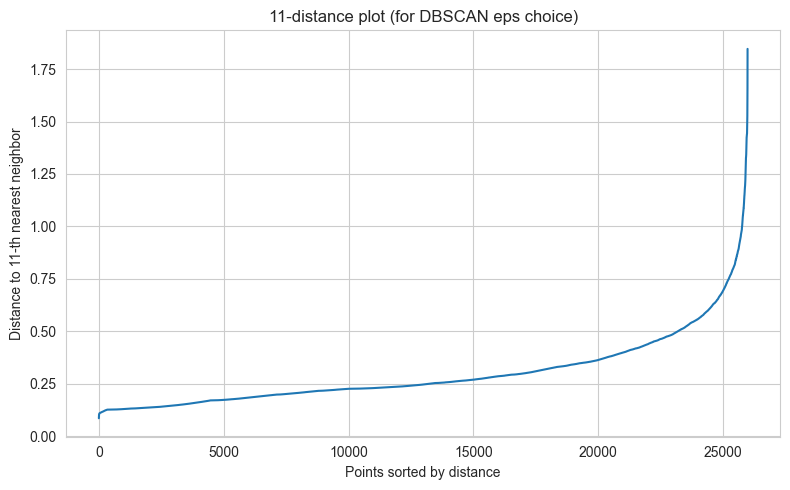

In [106]:
k = X_df.shape[1] + 1
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_df)

distances, indices = nn.kneighbors(X_df)
k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.plot(k_distances)
plt.ylabel(f"Distance to {k}-th nearest neighbor")
plt.xlabel("Points sorted by distance")
plt.title(f"{k}-distance plot (for DBSCAN eps choice)")
plt.tight_layout()
plt.show()

Based on the k-distance plot, the "elbow" point where the slope changes significantly appears to be around a distance of 0.8. We will select `eps=0.8` and set `min_samples=100` for the DBSCAN algorithm.

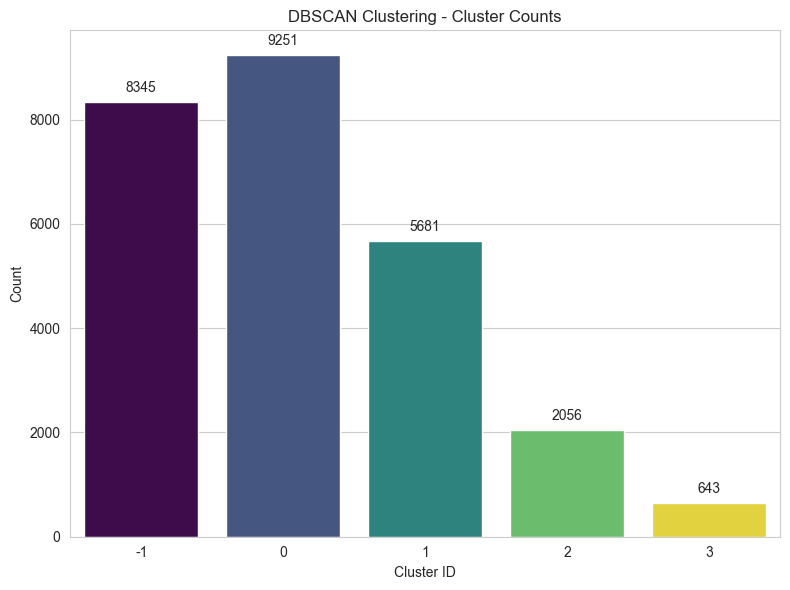

In [136]:
# 0.6, 50, 100, 200
# 1, 100
dbscan_labels = dbscan_scratch(X_df, eps=1, min_samples=400)

df_dbscan = df_clustering.copy()
df_clustering['dbscan_cluster'] = dbscan_labels

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
cluster_counts = pd.Series(dbscan_labels).value_counts().sort_index()

ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis", hue=cluster_counts.index, dodge=False, legend=False)
ax.set_title("DBSCAN Clustering - Cluster Counts")
ax.set_xlabel("Cluster ID")
ax.set_ylabel("Count")

for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
        ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

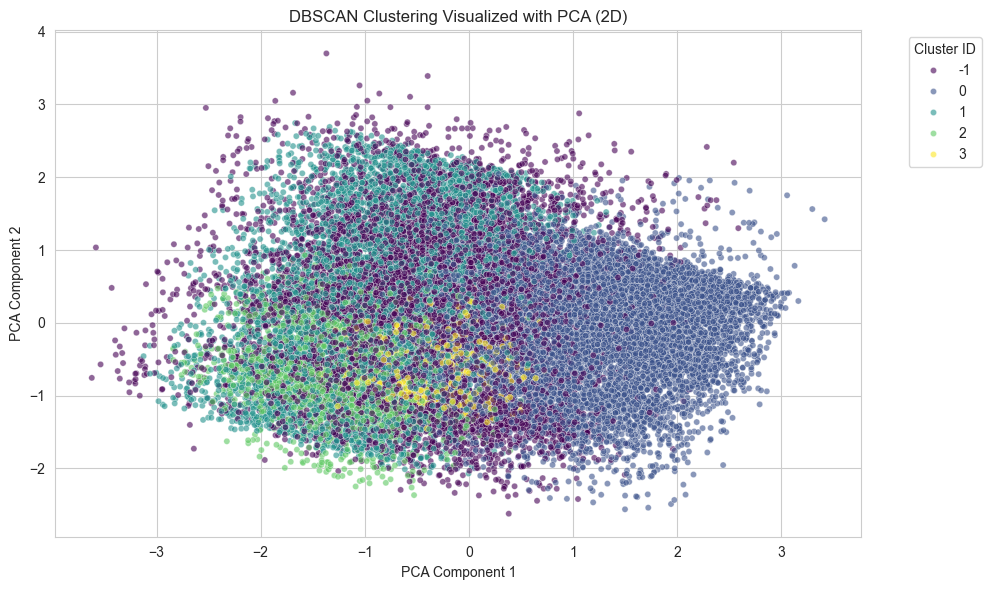

In [137]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_df)

plt.figure(figsize=(10, 6))
sns.scatterplot(
  x=X_pca_2d[:, 0], 
  y=X_pca_2d[:, 1], 
  hue=df_clustering['dbscan_cluster'], 
  palette='viridis',
  s=20,
  alpha=0.6
)

plt.title('DBSCAN Clustering Visualized with PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


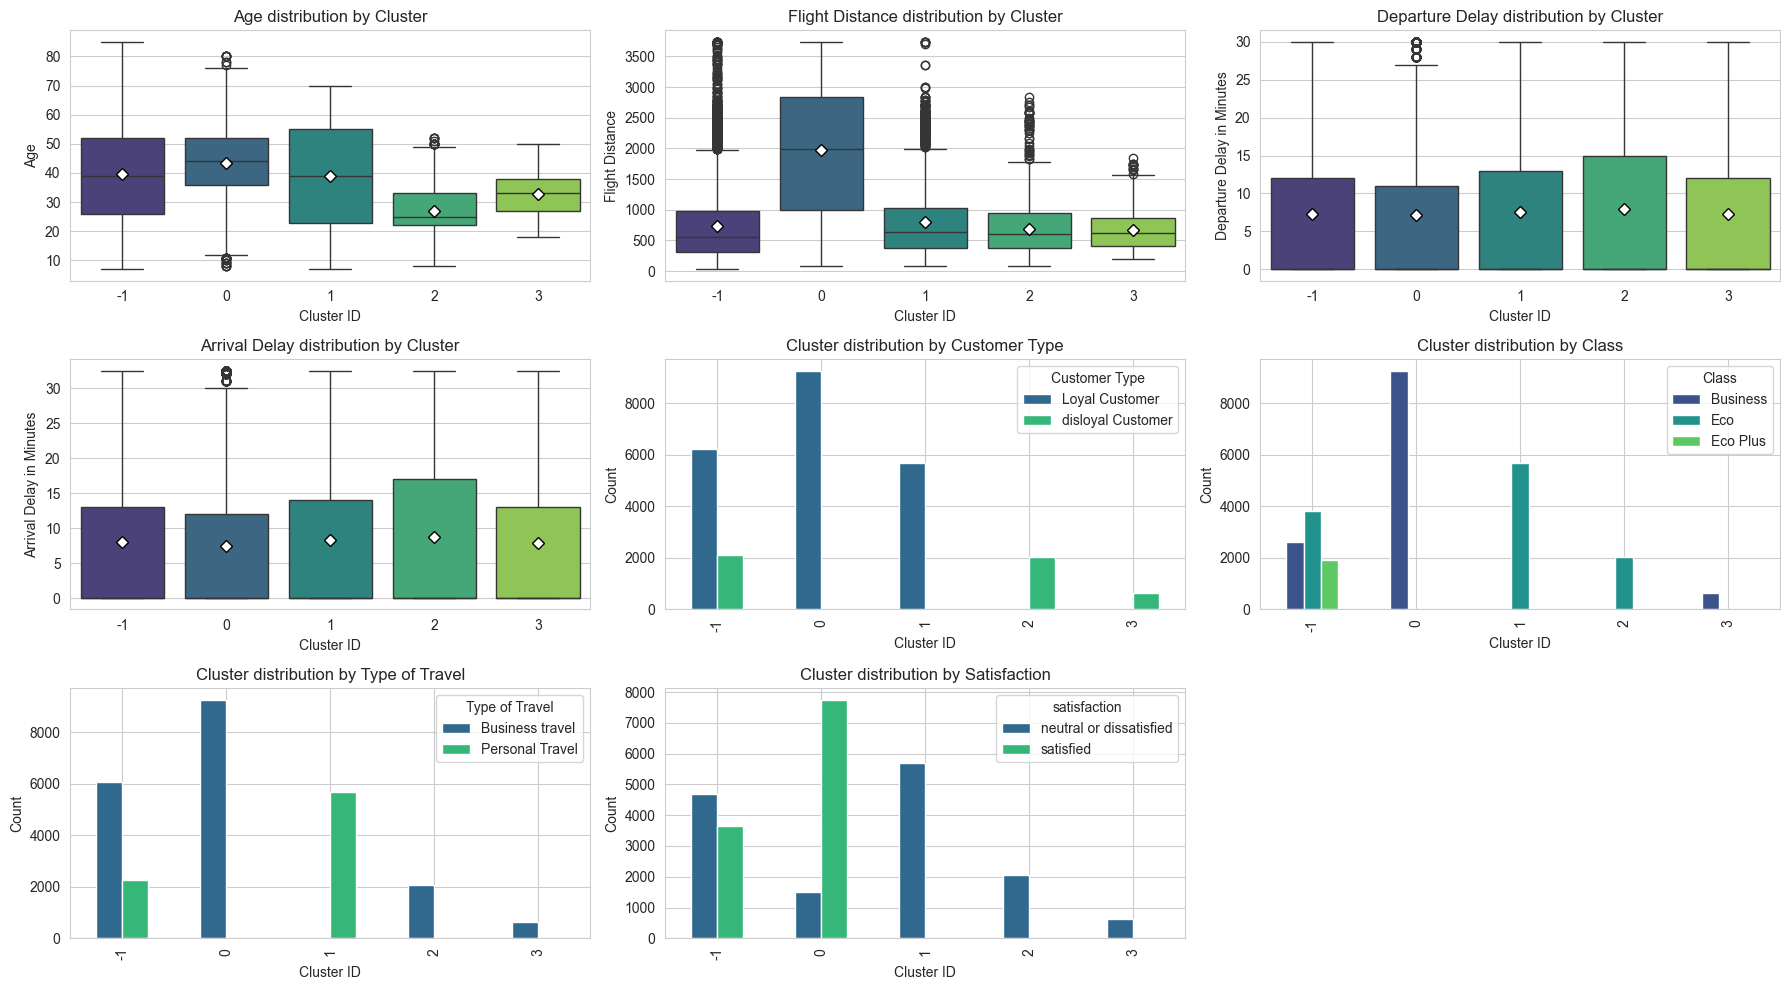

In [141]:
df_clustering['cluster_id'] = dbscan_labels

cols = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
cols = [c for c in cols if c in df_clustering.columns]

sns.set_style("whitegrid")
n_clusters = df_clustering['cluster_id'].nunique()
palette = sns.color_palette("viridis", n_clusters)

fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.ravel()

def cluster_numeric_boxplot(ax, df, num_col, title):
  sns.boxplot(
    data=df,
    x='cluster_id', y=num_col,
    palette=sns.color_palette("viridis", df['cluster_id'].nunique()),
    ax=ax, showmeans=True,
    meanprops={"marker": "D", "markeredgecolor": "black", "markerfacecolor": "white"},
    hue='cluster_id',
    legend=False
  )
  ax.set_title(title)
  ax.set_xlabel("Cluster ID")
  ax.set_ylabel(num_col)


def cluster_category_barplot(ax, df, cat_col, title):
  ctab = pd.crosstab(df['cluster_id'], df[cat_col])
  ctab.plot(kind='bar', ax=ax, color=sns.color_palette("viridis", len(ctab.columns)))
  ax.set_title(title)
  ax.set_xlabel("Cluster ID")
  ax.set_ylabel("Count")
  ax.legend(title=cat_col)
  
cluster_numeric_boxplot(axes[0], df_clustering, 'Age',
             "Age distribution by Cluster")
cluster_numeric_boxplot(axes[1], df_clustering, 'Flight Distance',
             "Flight Distance distribution by Cluster")
cluster_numeric_boxplot(axes[2], df_clustering, 'Departure Delay in Minutes',
              "Departure Delay distribution by Cluster")
cluster_numeric_boxplot(axes[3], df_clustering, 'Arrival Delay in Minutes',
              "Arrival Delay distribution by Cluster")
cluster_category_barplot(axes[4], df_clustering, 'Customer Type',
             "Cluster distribution by Customer Type")
cluster_category_barplot(axes[5], df_clustering, 'Class',
             "Cluster distribution by Class")
cluster_category_barplot(axes[6], df_clustering, 'Type of Travel',
             "Cluster distribution by Type of Travel")
cluster_category_barplot(axes[7], df_clustering, 'satisfaction',
             "Cluster distribution by Satisfaction")


# Hide unused subplots
for i in range(8, 9):
  axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**Cluster -1: The Outliers (High Delays & Edge Cases)**
- **Characteristics:** This cluster captures the "noise" that doesn't fit into the dense, normal operating patterns. Crucially, it contains almost all passengers who experienced **significant delays**. Since the majority of flights are on time, any substantial delay pushes a data point into this outlier bucket.
- **Demographics:** Highly mixed. It includes passengers from all classes and ages who simply had a "bad day" operationally.
- **Satisfaction:** Skews heavily towards **dissatisfied** due to the punctuality issues.

**Cluster 0: The Loyal Premium Warrior**
- **Characteristics:** The "Gold Standard" passenger.
- **Demographics:** Predominantly **Loyal Customers** flying in **Business Class** for **Business Travel**. They span a wide age range but represent the core revenue drivers.
- **Experience:** They experience **zero delays** and generally high service ratings.
- **Satisfaction:** High. This group is happy because the system is working exactly as designed for them.

**Cluster 1: The Established Economy Traveler**
- **Characteristics:** The reliable backbone of the economy cabin.
- **Demographics:** Mostly **Loyal Customers** in **Economy Class**. This group tends to be **older (40s+)** compared to Cluster 2. They are likely seasoned travelers flying for work or leisure but on a budget.
- **Experience:** Operationally smooth (no delays), but the in-flight experience is basic.
- **Satisfaction:** **Mixed to Neutral**. They aren't angry (no delays), but they aren't delighted (economy comfort).

**Cluster 2: The Young & Personal Traveler**
- **Characteristics:** A distinct demographic group defined by age and travel type.
- **Demographics:** Skews significantly **younger (Teens and 20s)**. Heavily dominated by **Economy Class** and includes a mix of **Personal Travel** and **Disloyal** customers.
- **Experience:** Standard economy experience with no delays.
- **Satisfaction:** Generally **Neutral**.


**Cluster 3: The Disloyal Business Traveler**
- **Characteristics:** A specific high-value opportunity segment.
- **Demographics:** **Disloyal Customers** flying **Business Class** (or Business Travel). These are likely price-shoppers or employees booked on the cheapest available business fare.
- **Experience:** High-quality business product with no delays.
- **Satisfaction:** **Neutral**. They enjoy the seat but have no emotional connection to the brand.

